# COGS 108 - Final Project

# Overview

When selecting courses to take, UCSD students often do research on courses and the corresponding professors through sources such as CAPE and Rate My Professors in order to maximize their chances of receiving the highest possible GPAs. However, this process is often inefficient and time-consuming. Therefore, we are curious as to what should students look for when selecting courses. Through combining and analysing data from various sources, we found that the most influential factors to a course's average GPA is its major (department average) GPA, Rate My Professors difficulty rating, and prerequisite counts. In this project we would like to predict future average gpa from past course data.

# Names

- Minghui Zhao
- William Lui
- Yanxun Li
- Cuiyi Tang
- Fei Yin

# Group Members IDs

- A14015992
- A14072509
- A15715550
- A15700053
- A15555426

# Research Questions

#### What should students look for when selecting courses in order to maximize their chances of receiving a higher GPA?

__Part 1: Cape Evaluation Analysis__
1. Is there a correlation between the percentage of submitted evaluations for a class and its average GPA?
2. If there is a correlation, what type of correlation is it?

__Part 2: First Time Teaching Analysis__
1. Is there a significant difference in the average class grade the first time it was taught, compared to its average grade over the entire history that it was taught by the same professor?
2. Does a professor have similar first-time-teaching behavior in different courses they have taught?
3. Does a course have similar first-time-teaching behavior when taught by different professors?

__Part 3: Quarter Difference Analysis__
1. Does the same class tend to give higher gpa if offered at a summer session?
2. Does the same class tend to have higher gpa in fall, winter or spring quarter?

__Part 4: Recommendation Analysis__
1. Is GPA correlated with class/instructor recommendation rate?
2. Is GPA correlated with Rate My Professor Rating scores?

__Part 5: Prerequisite Analysis__
1. Does the number of prerequisites that a course has affect its average GPA?
2. Does the number of times that a course serves as a prerequisite for other courses affect its average GPA?
3. Does a combination of the above two variables affect a course's average GPA?

# Background and Prior Work

UCSD is based on a quarter system, which consists of three main quarters every year, each lasting for 11 weeks. Due to the brevity of each quarter, students have to spend more time selecting courses. Moreover, students must fulfill three different categories of requirements before graduating: major requirements, college requirements, and university requirements. There are a lot of different majors and depths within each major at UCSD. In addition, each course has a vast pool of professors teaching it. As UCSD students, we have to manually research each professor's average GPA and teaching style before selecting our desire courses.

Our research questions above intrigue us because we are curious to find out what is the exact correlation between each of those potential factors to a course's resulting average GPA. Since we as current students were uncertain regarding these correlations before this project, other UCSD students and especially the incoming students could be benefitted by our study.

Regarding each part of our research question, we developed a corresponding hypothesis as shown below. Since we found no similar studies available, we have developed the hypothesis according to our own experiences as UCSD students.

Although there are no similar studies that directly answer our research questions, there are projects that aim to facilitate the UCSD course selection process. For example, in the first referenced link, there is a video describing an application made by CSE students. The application is able to look up CAPE and Rate My Professors statistics of courses offered in the past, such as the average GPA of different professors and the average time spent for each course. Essentially, the application is a planner that allows student to plan courses for future quarters. Additionally, the second referenced link is a recommender system built from scraped CAPE data that recommend professor based on professor's recommendation rate on CAPE.

References:
1. https://cse.ucsd.edu/about/news/commercial-teases-longer-video-about-cse-110-web-enrollment-application
2. http://smartercapes.com/

# Hypothesis

__Part 1: Cape Evaluation Analysis__
<br>The greater amount of evaluations turned in for a class would result in a lower GPA,<br> because the more evaluations turned in means student have a lot to complain about the course.

__Part 2: First Time Teaching Analysis__
<br>The greater amount of times a professor teaches the same course would result in a higher average<br> class grade because students can study from past course materials, such as old midterms and finals.

__Part 3: Quarter Difference Analysis__
<br>The difference in quarter would affect a course’s average GPA, in fall quarter students might feel more<br> motivated to study which results in higher grades, whereas in spring quarter students feel more frustrated after<br> only 1 week of spring break, which could result in lower grades; we expect courses taught in the summer to have higher average GPA.

__Part 4: Recommendation Analysis__
<br>The easier students can achieve high GPA in a class, the more the students want to recommend the class/instructor or give high rating scores.

__Part 5: Prerequisite Analysis__
<br>Larger number of prerequisites that a course has, or larger number of times that a course serves as a<br> prerequisite for other courses, leads to lower average GPA, because such courses are<br> likely more important and often serve as screening courses for some departments.

# Dataset(s)

### The 3 datasets we used to perform this analysis include:

#### 1) Scraped CAPE data (http://cape.ucsd.edu/ saved at `data/cape_raw.pkl`)
CAPE is a course rating system at UCSD, and we scraped all **32378** courses taught from 2007 Fall to 2019 Fall.
Columns in this dataset after our cleaning / processing will include:
- `course`: course name
- `term`: term taught
- `instr`: instructor
- `rcmnd_class`: recommend class rate (0-1)
- `rcmnd_instr`: recommend instructor rate (0-1)
- `time` average time consumed per week (hrs)
- `gpa_expected`: average GPA students expected (0-4)
- `gpa_actual`: average GPA students received (0-4)
- `evals`: amount of students filled out CAPE (students)
- `enroll`: amount of students enrolled (students)
- `dept`: department of the course
- `course_id`: course number (1-200, we are only analyzing undergrad courses)
- `term_time`: Python datatime time of the term taught for convenience
- `prof_mean`: average GPA students received for courses taught by this professor (0-4)
- `course_mean`: average GPA students received for this course taught all the time (0-4)

#### 2) Scraped RateMyProfessor data (http://ratemyprofessors.com/ saved at `data/rmp_final.pkl`)
This is the professor rating data we scraped from a popular third party website "RateMyProfessor" with **2064** different UCSD professor's information.
Columns in this dataset include:
- `instr_raw`: professor name linked to cape_df
- `rmp_name`: formatted professor name used to search on RateMyProfessor
- `rmp_score`: RateMyProfessor average score received (0-5, higher the better)
- `rmp_rating counr`: RateMyProfessor ratings received for this professor
- `rmp_take_again`: proportion of students would take this courses (0-1, -1 if missing data)
- `rmp_difficulty`: difficulty students vote for this professor (0-5, lower the easier)


#### 3) Scraped UCSD Catalog / Major requirements (https://www.ucsd.edu/catalog/ saved at `data/catalog.pkl`)
We scraped each UCSD department's catalog page which lists information of all courses offering under the department. It includes **1841** total courses in **21** different departments. Columns in this dataset includes:
- `dept`: course department
- `num`: course number (0-200)
- `desc`: course description
- `cred`: course units
- `prereq`: parsed preprequisite list (list of course ids)
- `course`: course id (including department)
- `prereq_count`: number of prerequisites
- `prereqed_count`: number of courses useing this as prerequisite

### Merging
CAPE dataset and RateMyProfessor dataset contains a shared key "professor name" (assuming no professor has the same name. Even if there is a few, the error resulted should still be neglectable given the amount of data we have).<br>
CAPE dataset and Catalog dataset contains a shared key "course number".
We can inner join CAPE with RateMyProfessor on key "professor name", then join with Catalog on key "course number". However, after doing so, we will lose the data entries for those courses / professors that does not have information in any of the three datasets. We will have a statistics after cleaning to show how much data has left.

# Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sets higher resolution for plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
import pandas as pd
import numpy as np
import pickle
import os
import re
import patsy
import statsmodels.api as sm
import datetime
import requests
import html
from bs4 import BeautifulSoup
import sys
from scipy import stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

### Scrape Datasets

#### 1.1 Scrape CAPE
After searching "," as professor name on `cape.ucsd.edu`, every single record are going to pop out because every professor name contains a ",". The webpage with all records is then saved as a html, and loaded, parsed, cleaned here.

In [2]:
# Load and parse html only the first time
if os.path.exists('data/cape_raw.pkl'):
    cape_df = pickle.load(open('data/cape_raw.pkl', 'rb'))
else:
    cape_df = pd.read_html('data/cape.htm')[0]
    pickle.dump(cape_df, open('data/cape_raw.pkl', 'wb'))
cape_df.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Hill, Seth J","AIP 197DC - Washington, DC Internship (A)",FA19,24,3,0.0 %,0.0 %,4.50,NaN,NaN
1,"Wienhausen, Gabriele",AIP 197T - AIP: Special Programs (A),FA19,11,4,100.0 %,100.0 %,2.00,NaN,NaN
2,"Shtienberg, Gilad",ANAR 116 - Sea Level Change - Israel (A),FA19,24,13,100.0 %,100.0 %,3.59,A- (3.70),B+ (3.35)
3,"Jones, Ian William Nasser",ANAR 121 - Cyber-Archaeology (A),FA19,14,5,100.0 %,100.0 %,1.70,B+ (3.60),NaN
4,"Hanson, Kari Lynne",ANBI 112 - Methods/Human CompNeuroscience (A),FA19,9,7,100.0 %,100.0 %,3.93,A- (3.86),NaN


#### 1.2 Clean CAPE
The CAPE data is a little messy but not too bad. After exploring, we found some rows has nan, which needs to be dropped; column names need to be renamed to follow Python naming conventions; course code / GPA needs to be reformatted to have a uniform format.<br><br>
To help with our analysis, we will also normalize the percentages (make percentages into [0,1]), separate department and course numbers, convert term into python datatime objects.<br><br>
Part of this cleaning credits to `https://github.com/andportnoy/smartercapes.com/blob/master/tools.py`

In [3]:
# Subset the columns we need for cleaning
cape_df = cape_df[['Instructor', 'Course', 'Term', 'Evals Made', 'Rcmnd Class',
         'Rcmnd Instr', 'Study Hrs/wk', 'Avg Grade Expected',
         'Avg Grade Received', 'Enroll']]

# rename the columns for convenience
cape_df = cape_df.rename(columns={
    'Instructor': 'instr', 'Course': 'course', 'Term': 'term',
    'Evals Made': 'evals', 'Rcmnd Class': 'rcmnd_class',
    'Rcmnd Instr': 'rcmnd_instr', 'Study Hrs/wk': 'time',
    'Avg Grade Expected': 'grade_expected',
    'Avg Grade Received': 'grade_actual',
    'Enroll': 'enroll',
})

# Due to CAPE system, some rows has data missing, so drop them
cape_df = cape_df.dropna()

# Only need the courses which hade at least one evaluation made
cape_df = cape_df[cape_df['evals'] != 0]

# Split to get the dept + course code
cape_df.loc[:, 'course'] = cape_df.course.str.split(' - ').apply(lambda x: x[0])

# convert the recommendation percentages to float values
# and resize to be in the interval [0, 1]:
cape_df.loc[:, 'rcmnd_instr'] = (cape_df.rcmnd_instr
                                 .str.rstrip(' %')
                                 .astype('float')) / 100

cape_df.loc[:, 'rcmnd_class'] = (cape_df.rcmnd_class
                                 .str.rstrip(' %')
                                 .astype('float')) / 100
cape_df['gpa_expected'] = (cape_df.grade_expected.str.split('(')
                           .apply(lambda x: x[-1])
                           .str.rstrip(')')
                           .astype('float'))
cape_df['gpa_actual'] = (cape_df.grade_actual.str.split('(')
                         .apply(lambda x: x[-1])
                         .str.rstrip(')')
                         .astype('float'))
# set and reset index to build an incremental index that starts at 0
cape_df = cape_df.set_index('instr').reset_index()
# Finally only keep the columns we need for analysis
cape_df = cape_df[
    ['course', 'term', 'instr', 'rcmnd_class', 'rcmnd_instr', 'time', 'gpa_expected', 'gpa_actual', 'evals',
     'enroll']]

In [4]:
# Helper functions for parsing
RE_DEPT_PARSER = '([A-Z]+) \d+[A-Z]*'
RE_COURSE_PARSER = '[A-Z]+ (\d+)[A-Z]*'

def find_dept(in_str):
    result = re.findall(RE_DEPT_PARSER, in_str)
    if len(result) == 0:
        print(f"Warning: Unable to parse {result}")
        return ''
    return result[0]


def find_course(in_str):
    result = re.findall(RE_COURSE_PARSER, in_str)
    if len(result) == 0:
        print(f"Warning: Unable to parse {result}")
        return 0
    return int(result[0])


def term_to_time(term_str):
    """
    Convert term string into datetime so they can be sorted, returns python datetime
    Example: 'FA19' -> 2019-09-01
    Note: Assumes in 20xx
    """
    term_to_month = {
        'FA': 9,
        'WI': 1,
        'SP': 4,
        'S1': 7,
        'S2': 8,
        'S3': 7
    }
    assert len(term_str) == 4
    term = term_str[:2]
    assert term in term_to_month.keys()
    year = int(term_str[2:])
    assert 0 <= year <= 99
    return datetime.date(year=year + 2000, month=term_to_month[term], day=1)

In [5]:
# More Parsing / Calculations to help analysis
cape_df['dept'] = cape_df['course'].apply(find_dept)
cape_df['course_id'] = cape_df['course'].apply(find_course)
cape_df['term_time'] = cape_df['term'].apply(term_to_time)

# Calculate professor / class average GPA
every_prof_dict = dict()
def process_same_course_diff_quarter(df):
    return df.mean().drop('course_id')  # course_id average doesn't make sense

def process_prof_all_courses(df):
    prof_name = df['instr'].iloc[0]
    every_prof_dict[prof_name] = df.groupby(by='course').apply(process_same_course_diff_quarter)

cape_df.groupby(by='instr').apply(process_prof_all_courses)

# Results in a multi-index (index: prof - course)
prof_average = pd.concat(every_prof_dict.values(), keys=every_prof_dict.keys())
prof_average.head()

# Separate course index
prof_average.reset_index(level=['course'])
prof_mean_gpa = cape_df.groupby('instr').mean()['gpa_actual'].to_dict()
course_mean_gpa = cape_df.groupby('course').mean()['gpa_actual'].to_dict()
cape_df['prof_mean'] = cape_df['instr'].apply(lambda x: prof_mean_gpa[x])
cape_df['course_mean'] = cape_df['course'].apply(lambda x: course_mean_gpa[x])
cape_df.head()

,course,term,instr,rcmnd_class,rcmnd_instr,time,gpa_expected,gpa_actual,evals,enroll,dept,course_id,term_time,prof_mean,course_mean
0,ANAR 116,FA19,"Shtienberg, Gilad",1.000,1.000,3.59,3.70,3.35,13,24,ANAR,116,2019-09-01,3.350000,3.3500
1,ANBI 131,FA19,"Non, Amy L",0.913,0.978,4.50,3.72,3.55,46,54,ANBI,131,2019-09-01,3.294000,3.5500
2,ANBI 141,FA19,"Gagneux, Pascal",0.984,0.983,4.40,3.56,2.77,63,136,ANBI,141,2019-09-01,3.073333,3.1290
3,ANBI 143,FA19,"Hrvoj Mihic, Branka",0.923,1.000,6.81,3.42,3.36,13,20,ANBI,143,2019-09-01,3.281667,3.1975
4,ANSC 105,FA19,"Olivas Hernandez, Olga Lid",1.000,1.000,3.36,3.57,3.68,15,34,ANSC,105,2019-09-01,3.741429,3.7825


#### 2 Scrape / Clean Catalog
Our solution to find amount of prerequisites is to scrape from UCSD General Catalog website (`ucsd.edu/catalog`).

Data scraped from UCSD Catalog is very unclean. Therefore we have to parse the data before finally storing them into a dataframe usable for analysis. The procedure of obtaining loading UCSD Catalog into dataframe is done in the following cell. 

However, most of the cleaning and parsing work is done with the function util_catalog.get_dept_catalog. Those work roughly include: obtain strings that contain prerequisites -> identify indices of the initial letter of each unit of prerequisite (a unit of prerequisite can be one or more prerequisites, Ex. COGS 108 is one prerequisite whereas Math 20AB is two) -> store contents between those indices as one or more prerequisites () -> use re to obtain `prereq_count` and `prereqed_count`, which are the two dependent variables used in Analysis Part 5.

In [87]:
import util_catalog # Contains all the messy work of scraping catalog website and parsing prerequisites

# Only parse if the data pickle file doesn't exist
if os.path.exists('data/catalog.pkl'):
    catalog_df = pickle.load(open('data/catalog.pkl', 'rb'))
else:
    # Remove courses held before 2010 for more relevance in analysis
    date_reference = datetime.date(2010, 1, 1)
    catalog_df = cape_df[cape_df["term_time"] >= date_reference]

    # Remove departments that held less than 200 courses (between 2010 and 2020)
    # such that correlations can be more easily exposed through analysis
    dept_to_retain = []
    for dept in catalog_df["dept"].unique():
        if catalog_df["dept"].value_counts()[dept] >= 200:
            dept_to_retain.append(dept)

    # Add data of each department's catalog (parsed by util_catalog) to catalog_data
    catalog_df = catalog_df[catalog_df["dept"].isin(dept_to_retain)]
    catalog_data = []
    for major in dept_to_retain:
        major_catalog_df = util_catalog.get_dept_catalog(major)
        if major_catalog_df is not None:  # None means cannot get catalog
            catalog_data.append(major_catalog_df)

    # Create catalog_df by concatenating all contents in the list, catalog_data
    catalog_df = pd.concat(catalog_data)
    pickle.dump(catalog_df, open('data/catalog.pkl', 'wb'))

cape_catalog_df = util_catalog.merge_catalog_to_cape(catalog_df, cape_df)
catalog_df.iloc[10:].head()

,dept,num,desc,cred,prereq,course,prereq_count,prereqed_count
10,BENG,112B,Fluid and Cell Biomechanics,4,[BENG 112A],BENG 112B,1.0,2.0
11,BENG,119A,Design Development in Biomechanics,3,[BENG 187B],BENG 119A,1.0,1.0
12,BENG,120,Organic Chemistry Structural and Design Princi...,4,[CHEM 6A 6B],BENG 120,2.0,2.0
13,BENG,122A,Biosystems and Control,4,"[MAE 140, BENG 134]",BENG 122A,2.0,1.0
14,BENG,123,Dynamic Simulation in Bioengineering,4,"[MATH 18, MATH 31AH, MATH 20D, BENG 120, CHEM ...",BENG 123,5.0,3.0


#### 3.1 Scrape RateMyProfessor
RateMyProfessor is a popular professor rating website many students use as a reference of choosing which professor's class to take at UCSD.<br>
Scraping from RateMyProfessor breaks into three steps:
1. From CAPE data we get a list of professor names. Put them into correct search format and make API calls to RateMyProfessor to search them under "UCSD" on RateMyProfessor, obtain their personal page link on RateMyProfessor
2. Download the HTML on their personal page link using `requests`
3. Parse the downloaded HTML for each professor's average rating score, number of ratings received, difficulty and % would take again.<br>

More details see comments<br>
The search part of this code credits to `https://github.com/remiliacn/RateMyProfessorPy/blob/master/RMPClass.py`

In [7]:
# Initial Query RateMyProfessor to find each professor's page according to unique professors in cape_df
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36"}

rmp_progress = {'total_count': len(cape_df.instr.unique()),
               'ok_count': 0,
               'dup_count': 0,
               'na_count': 0,
               'err_count': 0}

def get_rmp_url(prof_name):
    """ Takes prof name, query RMP and return rmp url for the page correspond to that professor """
    # This takes approximately 1/3 second to search (3000 queries -> 1000 seconds)
    global rmp_progress
    url = f"https://www.ratemyprofessors.com/search.jsp?queryoption=HEADER&queryBy=teacherName&schoolName=University+of+California+San+Diego&schoolID=1079&query={prof_name}"
    page = requests.get(url=url, headers=headers)
    pageData = page.text
    if page.status_code != 200:
        print(f'Error loading {url}! Internet?')
        rmp_progress['err_count'] += 1
        return ''
    pageDataTemp = re.findall(r'ShowRatings\.jsp\?tid=\d+', pageData)
    print("\n")
    total_count = sum([rmp_progress['ok_count'], rmp_progress['dup_count'], rmp_progress['na_count'], rmp_progress['err_count']])
    print(f"Searched:{total_count}/{rmp_progress['total_count']}, ok:{rmp_progress['ok_count']}, dup:{rmp_progress['dup_count']}, nf:{rmp_progress['na_count']}, err:{rmp_progress['err_count']}")
    if len(pageDataTemp) == 1:
        pageDataTemp = re.findall(r'ShowRatings\.jsp\?tid=\d+', pageData)[0]
        finalUrl = "https://www.ratemyprofessors.com/" + pageDataTemp
        rmp_progress['ok_count'] += 1
        return finalUrl
    elif len(pageDataTemp) > 1:
        print(f"{prof_name} has more than 1!")
        rmp_progress['dup_count'] += 1
        return ''
    else:
        print(f"{prof_name} not found!")
        rmp_progress['na_count'] += 1
        return ''

def instr_raw2search(raw):
    parsed = re.findall(r"(\w+), (\w+)", raw)
    if len(parsed) != 1:
        print(f"Cannot convert to search format: {raw}")
        return ''
    search = parsed[0][0] + '+' + parsed[0][1]
    return f"{search.upper()}"

In [8]:
# Perform search query -- This will take about 15 mins the first time
# Section files because github doesn't like each part > 100Mb
if os.path.exists('data/rmp_1.pkl') and os.path.exists('data/rmp_2.pkl') and os.path.exists('data/rmp_3.pkl') and os.path.exists('data/rmp_4.pkl'):
    rmp_df_1 = pickle.load(open('data/rmp_1.pkl', 'rb'))
    rmp_df_2 = pickle.load(open('data/rmp_2.pkl', 'rb'))
    rmp_df_3 = pickle.load(open('data/rmp_3.pkl', 'rb'))
    rmp_df_4 = pickle.load(open('data/rmp_4.pkl', 'rb'))
    rmp_df = pd.concat([rmp_df_1, rmp_df_2, rmp_df_3, rmp_df_4])
else:
    rmp_df = pd.DataFrame()
    rmp_df['instr_raw'] = cape_df.instr.unique()
    rmp_df['instr_search'] = rmp_df['instr_raw'].apply(instr_raw2search)
    rmp_df['rmp_html'] = np.nan
    rmp_df['rmp_url'] = rmp_df['instr_search'].apply(get_rmp_url)
    pickle.dump(rmp_df.iloc[:1000]    , open('data/rmp_1.pkl', 'wb'))
    pickle.dump(rmp_df.iloc[1000:2000], open('data/rmp_2.pkl', 'wb'))
    pickle.dump(rmp_df.iloc[2000:3000], open('data/rmp_3.pkl', 'wb'))
    pickle.dump(rmp_df.iloc[3000:]    , open('data/rmp_4.pkl', 'wb'))

In [9]:
# Clean up a little bit: find different professors who has same page urls
invalid_idx = np.array([])

def verify_result(sub_df):
    global invalid_idx
    if not np.all(sub_df['instr_search'] == sub_df['instr_search'].iloc[0]):
        invalid_idx = np.append(invalid_idx, sub_df.index)

dup_rmp_urls = rmp_df.groupby(by='rmp_url').filter(lambda x: (x.shape[0] > 1) and (x.shape[0] < 10))
dup_rmp_urls.groupby(by='rmp_url').apply(verify_result)
rmp_df = rmp_df.drop(index=invalid_idx)

In [10]:
# Fetch RMP html
def get_rmp_html(row):
    rmp_url = row['rmp_url']
    idx = row['index']
    page = requests.get(rmp_url)
    total_count = sum([rmp_progress['ok_count'], rmp_progress['err_count']])
    print(f"{total_count}/{rmp_progress['total_count']}, ok:{rmp_progress['ok_count']}, err:{rmp_progress['err_count']}")
    if page.status_code != 200:
        print(f'Error loading {url}! HTTP{page.status_code}')
        rmp_progress['err_count'] += 1
        return np.nan
    rmp_df.loc[idx, 'rmp_html'] = html.unescape(page.content.decode("utf-8"))
    rmp_progress['ok_count'] += 1
    if rmp_progress['ok_count'] % 20 == 0:
        pickle.dump(rmp_df, open('rmp.pkl', 'wb'))

In [11]:
# Get each prof's page HTML
# Only need to be run once.
# Automatically saves to file every 20 updates.
# Can continue from previous progress. It will take ~30 minutes depending on Internet speed.

rmp_working_df = rmp_df[(rmp_df['rmp_url'] != '') & (rmp_df['rmp_html'].isna())].copy()
rmp_working_df['index'] = rmp_working_df.index
rmp_progress = {'total_count': rmp_working_df.shape[0],
               'ok_count': 0,
               'err_count': 0}
rmp_working_df[['rmp_url', 'index']].apply(get_rmp_html, axis=1)
print("Done!")

0/2, ok:0, err:0
1/2, ok:1, err:0


Done!


#### 3.2 Parse / Clean RateMyProfessor
Up to this point we have all professor's personal page HTML saved. They are web pages that contains the information we needed, but we still need to parse them.<br>
Beautifulsoup is used in parsing, and parsing is done by looking for the specific html class and find the text under it.<br>
Since we cleaned some problematic data during the process of fetching HTML (e.g. Different professor has same personal page, coule be because of they have same first, last name), the data here isn't too messy.<br>
We still need to drop those professor that has 0 ratings, professors that couldn't be found on RateMyProfessors, etc. More details in comments below.

In [12]:
def parse_rmp_html(html):
    print(f"{rmp_progress['ok_count']}/{rmp_progress['total_count']}, ok:{rmp_progress['ok_count']}, err:{rmp_progress['err_count']}")

    soup = BeautifulSoup(html, 'html.parser')
    RE_TEACHER_FEEDBACK_PARSER = r'^(\d+\.?\d*%?)(.+)'
    RE_RATING_NUMBER_PARSER = f'on (\d+) ratings'
    no_rating_headline = soup.find('div', class_='headline')  # If prof has 0 ratings
    if no_rating_headline is not None:
        return
    prof_name = soup.find('div', class_='NameTitle__Name-dowf0z-0 cjgLEI').text
    rmp_score = float(soup.find('div', class_='RatingValue__Numerator-qw8sqy-2 gxuTRq').text)
    rating_number_str = soup.find('div', class_='RatingValue__NumRatings-qw8sqy-0 hDaWgM').text
    rmp_rating_number = int(re.findall(RE_RATING_NUMBER_PARSER, unicodedata.normalize("NFKD", rating_number_str))[0])

    rmp_take_again = -1
    rmp_diff = -1
    for i in soup.find('div', class_='TeacherFeedback__StyledTeacherFeedback-gzhlj7-0 jCDePN'):
        parsed = re.findall(RE_TEACHER_FEEDBACK_PARSER, i.text)
        if len(parsed) == 1 and len(parsed[0]) == 2:
            parsed = parsed[0]
            if parsed[1] == 'Would take again':
                assert parsed[0][-1] == '%'
                rmp_take_again = int(parsed[0][:-1]) / 100.0
            elif parsed[1] == 'Level of Difficulty':
                rmp_diff = float(parsed[0])
            else:
                print("Unrecognized teacher feedback type {parsed}!")
        else:
            print(f"Cannot parse {i.text}!")
            rmp_progress['err_count'] += 1
#     print(f"{prof_name}: score{rmp_score}, ratings:{rmp_rating_number}")
    rmp_progress['ok_count'] += 1
    return prof_name, rmp_score, rmp_rating_number, rmp_take_again, rmp_diff

In [13]:
# Parse RateMyProfessor HTML
if os.path.exists('data/rmp_final.pkl'):
    rmp_df = pickle.load(open('data/rmp_final.pkl', 'rb'))
else:
    # Drop rows without a URL (Prof that couldn't be found on RMP)
    rmp_df = rmp_df.dropna()
    rmp_progress = {'total_count': rmp_df.shape[0],
                   'ok_count': 0,
                   'err_count': 0}
    rmp_df['rmp_parsed'] = rmp_df.loc[:, 'rmp_html'].apply(parse_rmp_html)
    rmp_df[['rmp_name', 'rmp_score', 'rmp_rating_count', 'rmp_take_again', 'rmp_difficulty']] = pd.DataFrame(rmp_df['rmp_parsed'].tolist(), index=rmp_df.index)
    rmp_df = rmp_df[['instr_raw', 'rmp_name', 'rmp_score', 'rmp_rating_count', 'rmp_take_again', 'rmp_difficulty']]
    pickle.dump(rmp_df, open('data/rmp_final.pkl', 'wb'))

print(f"RMP Data size: {rmp_df.shape[0]}")
rmp_df.head()

RMP Data size: 2064


,instr_raw,rmp_name,rmp_score,rmp_rating_count,rmp_take_again,rmp_difficulty
2,"Gagneux, Pascal",Pascal Gagneux,4.8,4.0,1.00,2.8
7,"Stewart, Alexander B",Alexander Stewart,3.6,37.0,0.69,2.9
9,"Goldstein, Paul S",Paul Goldstein,3.5,39.0,0.67,2.5
12,"Borrero, Mario Ricardo",Mario Borrero,4.0,1.0,1.00,3.0
13,"Christie, Veronica Ann",Veronica Christie,5.0,2.0,1.00,3.0


#### 4. Merge and final cleaning
Finally, we have all CAPE, Catalog (Prerequisite), and RateMyProfessor data.<br>
Now for the analysis we will do later, we want to merge those data. Note merging them will reduce the size of our data because we will only be keeping records that has all three CAPE, Prerequisites, and RateMyProfessor professor data.<br>
<br>
Real world data is very messy. Further cleaning is also required as when we explore these results we find some abnormal outliers that could affect our analysis. Details are in comments below.

In [14]:
cape_rmp_df = cape_df.reset_index().merge(rmp_df,
                            left_on='instr', right_on='instr_raw',
                            how='left', left_index=True, right_index=False).set_index('index')
# Dropping columns with nan because those are professors on CAPE but not found on RateMyProfessor
cape_rmp_df = cape_rmp_df.dropna()

In [15]:
all_df = cape_catalog_df.reset_index().merge(rmp_df,
                            left_on='instr', right_on='instr_raw',
                            how='left', left_index=True, right_index=False).set_index('index')
# Dropping columns with nan because those are professors on CAPE but not found on RateMyProfessor
all_df = all_df.dropna()

In [16]:
# Calculates two more columns for convenience of analysis
major_gpa_dict = all_df.groupby('dept_x').mean()['gpa_actual'].to_dict()
all_df['major_gpa'] = all_df['dept_x'].apply(lambda x: major_gpa_dict[x])
all_df['is_upper'] = all_df['course_id'] >= 100

`all_df['prereqed_count']` is limited to < 100 because we found that COMM 10 is a prerequisite for 103 courses, 
which we are removing as an outlier. Proof to this can be found at: <https://www.ucsd.edu/catalog/courses/COMM.html>

In [17]:
all_df = all_df[all_df['prereqed_count'] < 100]

In [18]:
rmp_count_less = all_df[all_df['rmp_rating_count'] < 10].shape[0]
rmp_count_more = all_df[all_df['rmp_rating_count'] >= 10].shape[0]
print(f"Records for RateMyProfessor rating < 10: {rmp_count_less}")
print(f"Records for RateMyProfessor rating >= 10: {rmp_count_more}")

Records for RateMyProfessor rating < 10: 3778
Records for RateMyProfessor rating >= 10: 11054


Since professors with >= 10 rating has majority of data, we won't lose much data after dropping records with < 10 ratings, but we would reduce our outliers effectively because the data is easy to be outliers if there is little students rated the professor, and the average professor score just become that one or two studfent's rating

In [19]:
all_df = all_df[all_df['rmp_rating_count'] > 10]

#### The merged dataframe we are working with

In [20]:
all_df.head()

,dept_x,num,desc,cred,prereq,course,prereq_count,prereqed_count,term,instr,...,prof_mean,course_mean,instr_raw,rmp_name,rmp_score,rmp_rating_count,rmp_take_again,rmp_difficulty,major_gpa,is_upper
index,,,,,,,,,,,,,,,,,,,,,
157,BENG,130,Biotechnology Thermodynamics and Kinetics,4,"[CHEM 6B, MATH 20A 20B 20D, PHYS 2A 2B 2C]",BENG 130,7.0,0.0,WI13,"Varghese, Shyni",...,3.204545,3.272,"Varghese, Shyni",Shyni Varghese,3.46,38.0,0.85,4.26,3.386346,True
158,BENG,130,Biotechnology Thermodynamics and Kinetics,4,"[CHEM 6B, MATH 20A 20B 20D, PHYS 2A 2B 2C]",BENG 130,7.0,0.0,WI12,"Varghese, Shyni",...,3.204545,3.272,"Varghese, Shyni",Shyni Varghese,3.46,38.0,0.85,4.26,3.386346,True
159,BENG,130,Biotechnology Thermodynamics and Kinetics,4,"[CHEM 6B, MATH 20A 20B 20D, PHYS 2A 2B 2C]",BENG 130,7.0,0.0,WI11,"Varghese, Shyni",...,3.204545,3.272,"Varghese, Shyni",Shyni Varghese,3.46,38.0,0.85,4.26,3.386346,True
160,BENG,130,Biotechnology Thermodynamics and Kinetics,4,"[CHEM 6B, MATH 20A 20B 20D, PHYS 2A 2B 2C]",BENG 130,7.0,0.0,WI10,"Varghese, Shyni",...,3.204545,3.272,"Varghese, Shyni",Shyni Varghese,3.46,38.0,0.85,4.26,3.386346,True
161,BENG,130,Biotechnology Thermodynamics and Kinetics,4,"[CHEM 6B, MATH 20A 20B 20D, PHYS 2A 2B 2C]",BENG 130,7.0,0.0,WI09,"Varghese, Shyni",...,3.204545,3.272,"Varghese, Shyni",Shyni Varghese,3.46,38.0,0.85,4.26,3.386346,True


In [21]:
all_df.shape

(10552, 30)

In [22]:
all_df.columns

Index(['dept_x', 'num', 'desc', 'cred', 'prereq', 'course', 'prereq_count',
       'prereqed_count', 'term', 'instr', 'rcmnd_class', 'rcmnd_instr', 'time',
       'gpa_expected', 'gpa_actual', 'evals', 'enroll', 'dept_y', 'course_id',
       'term_time', 'prof_mean', 'course_mean', 'instr_raw', 'rmp_name',
       'rmp_score', 'rmp_rating_count', 'rmp_take_again', 'rmp_difficulty',
       'major_gpa', 'is_upper'],
      dtype='object')

---
---
Up to this point, we have loaded and cleaned the following data and are ready for analysis

#### Complete individual datasets
- `cape_df`: Scraped CAPE data, 32378 course records
- `catalog_df`: Scraped Catalog data, 1841 different courses in 21 departments
- `rmp_df`: Scraped RateMyProfessor (RMP) data, 2064 different professor information

---

The merged datasets will lose information that's not in both datasets, so there will be less information
#### Merged datasets
- `cape_rmp_df`: `cape_df` merged with `rmp_df`, 24561 course records with CAPE and RMP information
- `cape_catalog_df`: `cape_df` merged with `catalog_df`, 19543 course records with CAPE and Catalog (prerequisite) information
- `all_df`: `cape_df` merged with `catalog_df` and `rmp_df`, 10552 course records with CAPE, RMP and Catalog (prerequisite) information

----

# Data Analysis & Results

## Analysis Part 1: Cape Evaluation analysis
__Research questions:__
1. Is there a correlation between the percentage of submitted evaluations for a class and its average GPA?
2. If there is a correlation, what type of correlation is it?

In [23]:
# Create a subdataset for this part of the analysis
df_eval_analysis = all_df[['gpa_actual', 'gpa_expected', 'evals', 'enroll']]
df_eval_analysis['eval_percent'] = df_eval_analysis['evals'] / df_eval_analysis['enroll']

In [24]:
# Cap evaluation percentage at 1
def cleanEval(percentage):
    if percentage > 1:
        return 1
    else:
        return percentage

In [25]:
df_eval_analysis['eval_percent'] = df_eval_analysis['eval_percent'].apply(cleanEval)

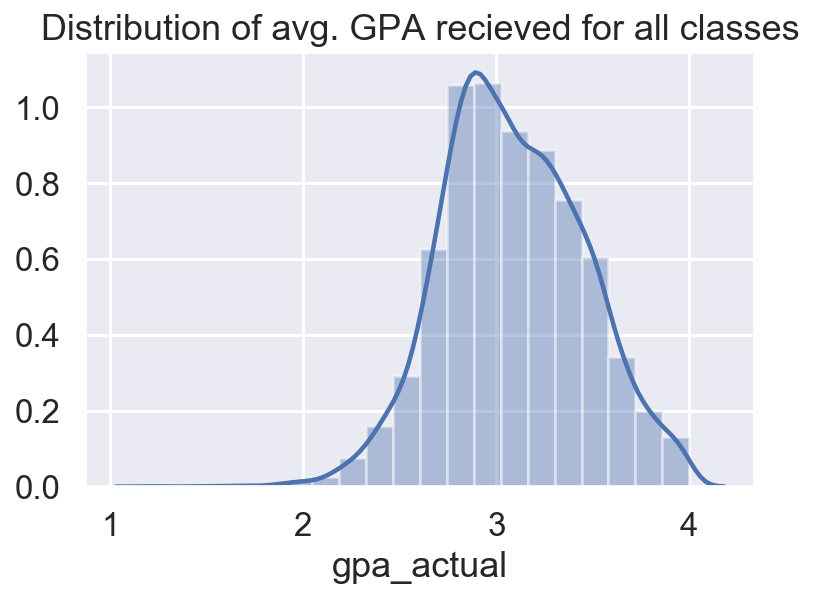

In [26]:
sns.distplot(df_eval_analysis['gpa_actual'], bins=20).set_title('Distribution of avg. GPA recieved for all classes');

In [27]:
stats.normaltest(df_eval_analysis['gpa_actual'])

NormaltestResult(statistic=7.105227992392701, pvalue=0.02864965160737565)

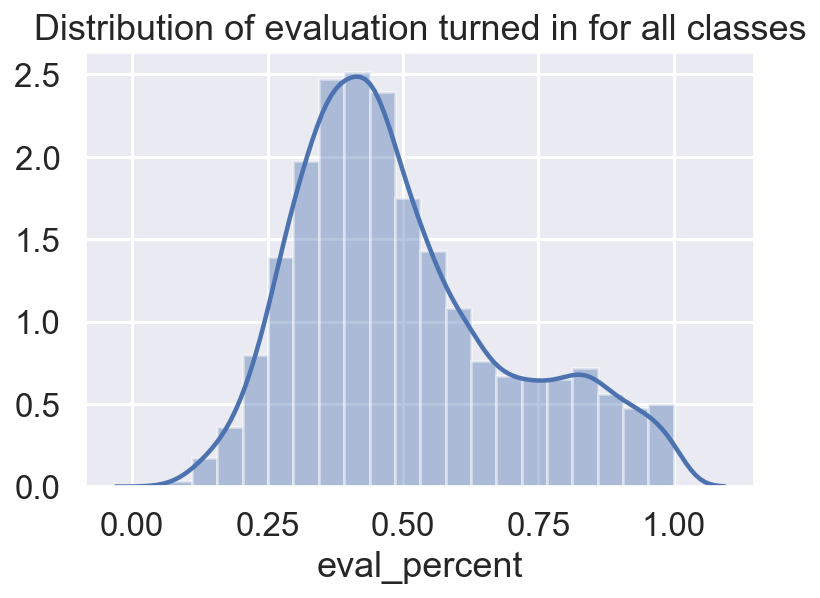

In [28]:
sns.distplot(df_eval_analysis['eval_percent'], bins=20).set_title('Distribution of evaluation turned in for all classes');

In [29]:
stats.normaltest(df_eval_analysis['eval_percent'])

NormaltestResult(statistic=726.8529469867883, pvalue=1.4651698871418032e-158)

Although our gpa is roughly normally distributed, our eval_percent isn't.<br> Note that eval_percent represents the percentage of evaluations that were turn in for a class. <br>However, if we cut eval_percent at the .75 mark, it is roughly normal. <br> We will do this under the assumption that professors offered extra credit for completing cape, and it is skewing the data. <br> We are now ready to use linear regression.

In [30]:
df_eval_analysis = df_eval_analysis[df_eval_analysis['eval_percent'] <=.75]

                            OLS Regression Results                            
Dep. Variable:             gpa_actual   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2667
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.606
Time:                        23:10:15   Log-Likelihood:                -3815.9
No. Observations:                9026   AIC:                             7636.
Df Residuals:                    9024   BIC:                             7650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0731      0.013    233.140   

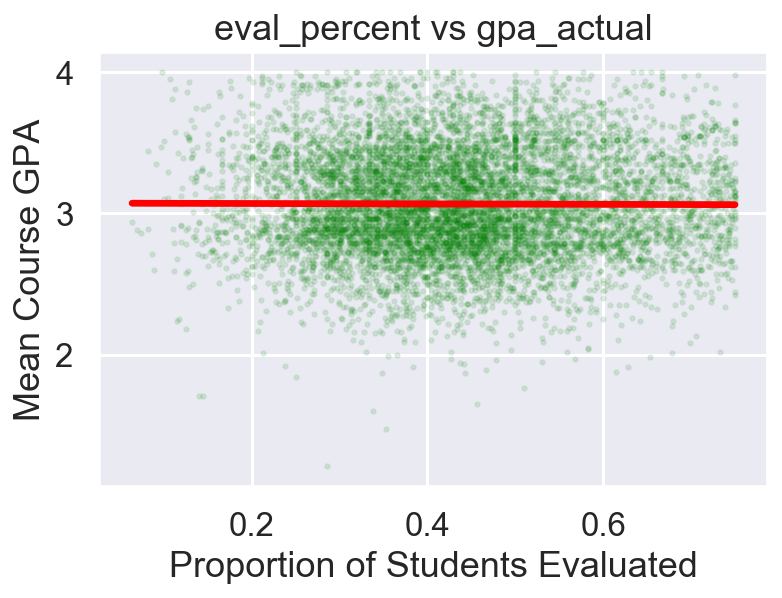

In [31]:
outcome, predictors = patsy.dmatrices("gpa_actual ~ eval_percent", df_eval_analysis)

mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

sns.regplot(x="eval_percent", y="gpa_actual", data=df_eval_analysis, color='red', scatter_kws={'alpha':0.1, 's':5,
                                                                                              'color': 'green'}).set_title('eval_percent vs gpa_actual');
plt.ylabel('Mean Course GPA')
plt.xlabel('Proportion of Students Evaluated');

Visually looking the graph there doesn't seem to have a linear relationship.
<br>Furthermore, if the R-squared value it is 0.
<br>Lets confirm out suspicion by looking at the pearson correlation.

In [32]:
stats.pearsonr(df_eval_analysis['gpa_actual'], df_eval_analysis['eval_percent'])

(-0.0054367031909002645, 0.6055417602047043)

Pearson correlation is greater than .05, so we will reject our null hypothesis of there being a correlation.
<br>Pearson only looks at linear correlation, so lets check if there is any other type of correlation.

In [33]:
stats.spearmanr(df_eval_analysis['gpa_actual'], df_eval_analysis['eval_percent'])

SpearmanrResult(correlation=-0.0065040094346710195, pvalue=0.5366833966025725)

In [34]:
stats.kendalltau(df_eval_analysis['gpa_actual'], df_eval_analysis['eval_percent'])

KendalltauResult(correlation=-0.0043161608273801, pvalue=0.5403824162137693)

Both Spearman correlation and Kendalltau correlation test have a p-value higher than 0.5.
<br>All 3 of our correlation (spearman, kendalltau, pearson) failed to prove the data have a correlation.
<br>So, we will assume there is no correlation between the number of evaluation turned in and the actual grade recieved for that class.<br>Therefore, the evals and enroll columns will not be used from our data to compute our final classifier.

----

## Analysis Part 2: First Time Teaching Analysis
__Research Questions:__
1. Is there a significant difference in the average class grade the first time it was taught, <br>compared to its average grade over the entire history that it was taught by the same professor?
2. Does a professor have similar first-time-teaching behavior in different courses they have taught?
3. Does a course have similar first-time-teaching behavior when taught by different professors?

In [35]:
cape_df_instr_multiple_teach = cape_df.groupby(by=['course', 'instr']).filter(lambda x: len(x) > 1)
cape_df_same_course_prof_grp = cape_df_instr_multiple_teach.groupby(by=['course', 'instr'])
print(f"{cape_df_same_course_prof_grp.count().shape[0]} unique professor-course pairs")

5577 unique professor-course pairs


In [36]:
def process_prof_teaches(df):
    global first_time_stats
    first_time = df.iloc[-1]
    second_time = df.iloc[-2]
    other_time_mean = df.iloc[:-1].mean()

    first_time_stats['prof']              = np.append(first_time_stats['prof']             , first_time['instr'])
    first_time_stats['course']            = np.append(first_time_stats['course']           , first_time['course'])
    first_time_stats['gpa_diff']          = np.append(first_time_stats['gpa_diff']         , first_time['gpa_actual'] - other_time_mean['gpa_actual'])
    first_time_stats['gpa_exp_diff']      = np.append(first_time_stats['gpa_exp_diff']     , first_time['gpa_expected'] - other_time_mean['gpa_expected'])
    first_time_stats['time_diff']         = np.append(first_time_stats['time_diff']        , first_time['time'] - other_time_mean['time'])
    first_time_stats['rcmnd_course_diff'] = np.append(first_time_stats['rcmnd_course_diff'], first_time['rcmnd_class'] - other_time_mean['rcmnd_class'])
    first_time_stats['rcmnd_prof_diff']   = np.append(first_time_stats['rcmnd_prof_diff']  , first_time['rcmnd_instr'] - other_time_mean['rcmnd_instr'])
    first_time_stats['teach_times']       = np.append(first_time_stats['teach_times']      , df.shape[0])


In [37]:
first_time_stats = {
    'prof':              np.array([]),
    'course':            np.array([]),
    'gpa_diff':          np.array([]),
    'gpa_exp_diff':      np.array([]),
    'time_diff':         np.array([]),
    'rcmnd_course_diff': np.array([]),
    'rcmnd_prof_diff':   np.array([]),
    'teach_times':       np.array([]),
}

cape_df_instr_multiple_teach.groupby(by=['course', 'instr']).apply(process_prof_teaches)
first_time_stat_df = pd.DataFrame(first_time_stats)
first_time_stat_df

,prof,course,gpa_diff,gpa_exp_diff,time_diff,rcmnd_course_diff,rcmnd_prof_diff,teach_times
0,"Levy, Thomas E",ANAR 111,-0.136667,0.213333,-0.790000,0.0070,-0.24700,4.0
1,"Muniz, Adolfo A",ANAR 111,-0.020000,-0.010000,0.030000,0.1680,0.18500,2.0
2,"Levy, Thomas E",ANAR 143,0.117500,0.230000,-1.590000,-0.1600,-0.22375,5.0
3,"Braswell, Geoffrey E.",ANAR 144,-0.210000,-0.230000,0.270000,0.0790,0.03400,2.0
4,"Braswell, Geoffrey E.",ANAR 153,-0.458000,-0.140000,-0.198000,-0.1076,-0.10340,6.0
...,...,...,...,...,...,...,...,...
5572,"Bauer, Holly Jean",WCWP 10B,-0.170000,-0.150000,-0.460000,-0.1060,-0.15400,2.0
5573,"Gagnon, Jeffrey C",WCWP 10B,-0.154000,-0.092000,1.390000,-0.0518,-0.13340,6.0
5574,"Gocsik, Karen Marie",WCWP 10B,0.122000,0.030000,-0.186000,-0.0778,-0.05900,6.0
5575,"Picciotto, Madeleine",WCWP 10B,-0.476667,-0.328333,1.461667,0.0805,0.00000,7.0


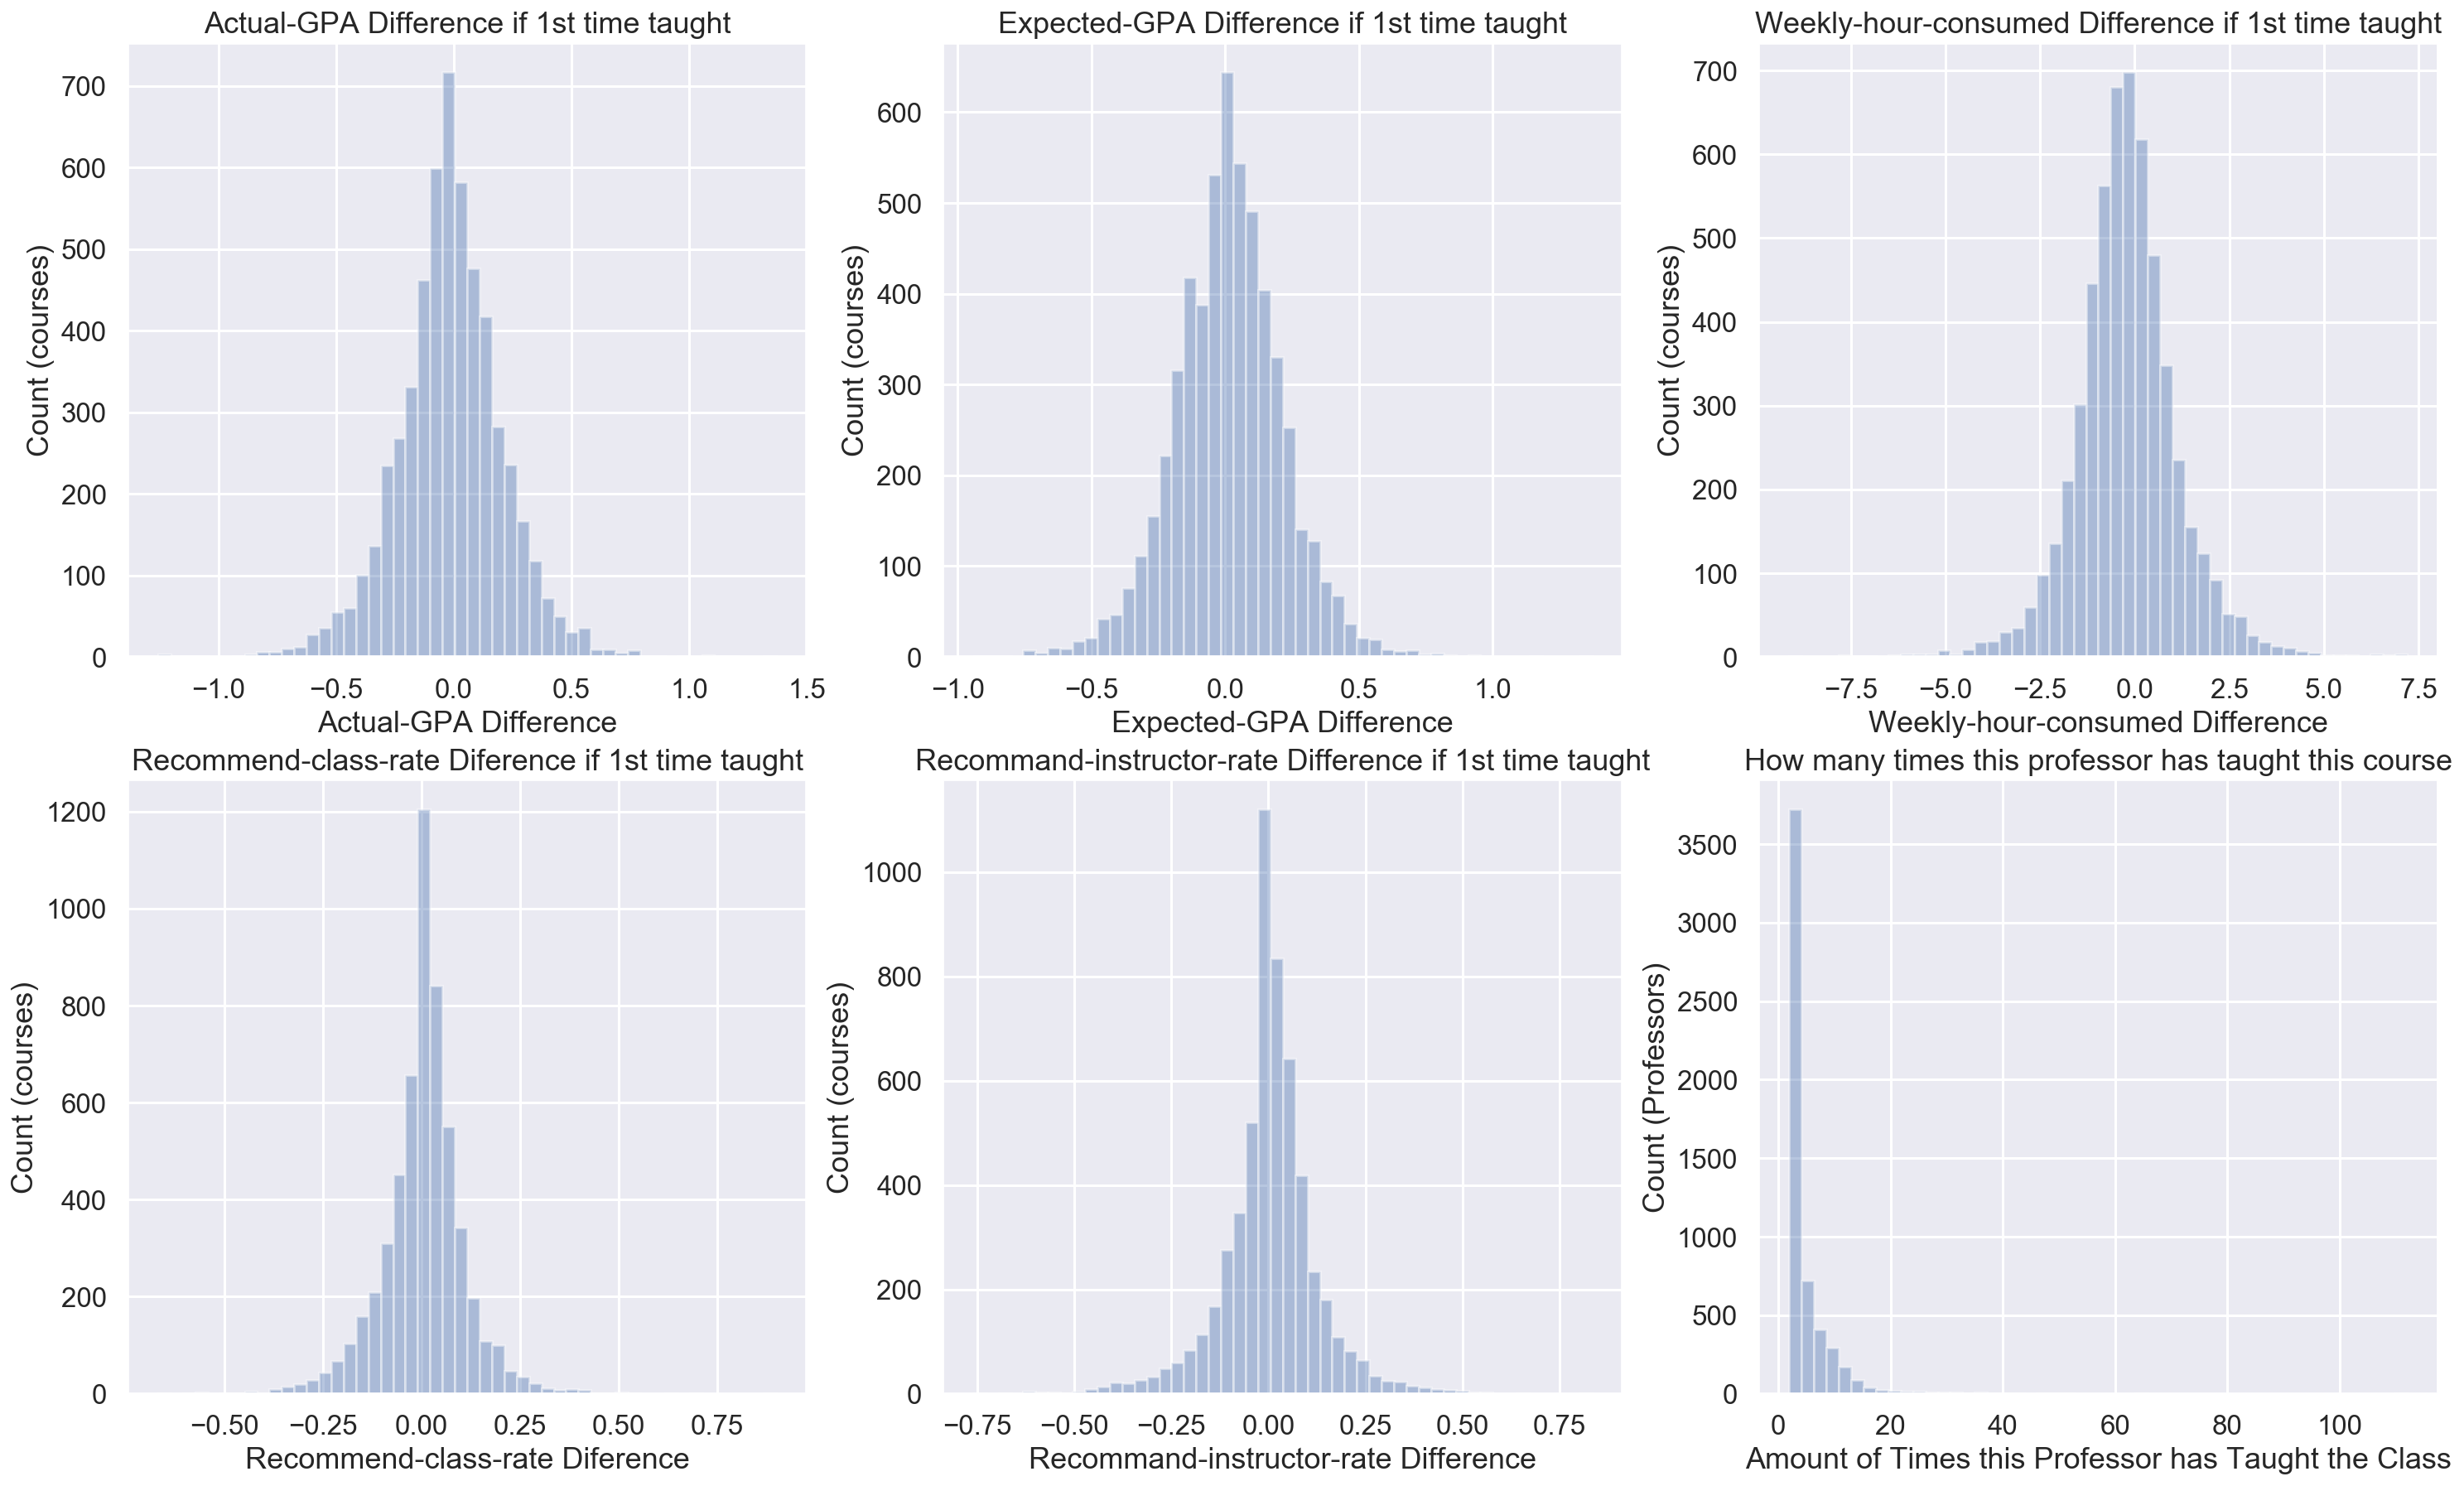

In [75]:
fig, axes = plt.subplots(2,3, figsize=(25,15))
sns.distplot(first_time_stat_df['gpa_diff'], ax=axes[0,0], kde=False), axes[0,0].set_title('Actual-GPA Difference if 1st time taught'); axes[0,0].set_xlabel('Actual-GPA Difference')
sns.distplot(first_time_stat_df['gpa_exp_diff'], ax=axes[0,1], kde=False), axes[0,1].set_title('Expected-GPA Difference if 1st time taught'); axes[0,1].set_xlabel('Expected-GPA Difference')
sns.distplot(first_time_stat_df['time_diff'], ax=axes[0,2], kde=False), axes[0,2].set_title('Weekly-hour-consumed Difference if 1st time taught'); axes[0,2].set_xlabel('Weekly-hour-consumed Difference')
sns.distplot(first_time_stat_df['rcmnd_course_diff'], ax=axes[1,0], kde=False), axes[1,0].set_title('Recommend-class-rate Diference if 1st time taught'); axes[1,0].set_xlabel('Recommend-class-rate Difference)
sns.distplot(first_time_stat_df['rcmnd_prof_diff'], ax=axes[1,1], kde=False), axes[1,1].set_title('Recommand-instructor-rate Difference if 1st time taught'); axes[1,1].set_xlabel('Recommend-instructor-rate Difference')
sns.distplot(first_time_stat_df['teach_times'], ax=axes[1,2], kde=False), axes[1,2].set_title('How many times this professor has taught this course'); axes[1,2].set_ylabel('Count (Professors)'); axes[1,2].set_xlabel('Amount of Times this Professor has Taught the Class')
for ax in axes.flatten()[:-1]:
    ax.set_ylabel('Count (courses)')

We can see that the first time gpa received difference, gpa expected difference, time consumption difference, recomment class / professor rate difference are all normally distributed.<br>
The amount of times this professor has taught the course is concentrated below 10 times.

Next, we will analyze if there is a relationship between the amount of times a profess has taught and his / her first time gpa difference.

In [39]:
# Summarize how many professors has first times better gpa / worse
first_time_better = (first_time_stat_df['gpa_diff'] > 0).sum()
first_time_same = (first_time_stat_df['gpa_diff'] == 0).sum()
first_time_worse = (first_time_stat_df['gpa_diff'] < 0).sum()
print(f'First time GPA > Average GPA: {first_time_better} times')
print(f'First time GPA = Average GPA: {first_time_same} times')
print(f'First time GPA < Average GPA: {first_time_worse} times')

First time GPA > Average GPA: 2535 times
First time GPA = Average GPA: 158 times
First time GPA < Average GPA: 2884 times


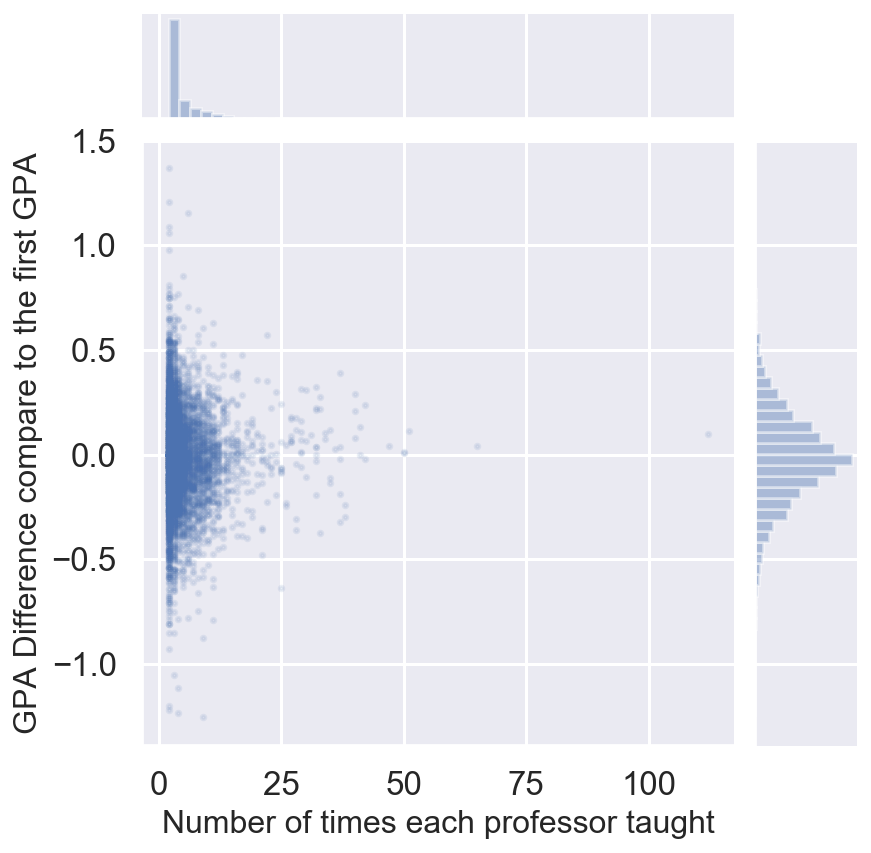

In [40]:
teach_time_dist = sns.jointplot(x=first_time_stats['teach_times'], y=first_time_stats['gpa_diff'])
# Clear the axes containing the scatter plot
teach_time_dist.ax_joint.cla()

# Plot each individual point separately so we have custom size and opacity settings
teach_time_dist.ax_joint.scatter(first_time_stats['teach_times'], first_time_stats['gpa_diff'], s=5, alpha=0.1)

teach_time_dist.set_axis_labels('Number of times each professor taught', 'GPA Difference compare to the first GPA', fontsize=16); plt.show()

From the distribution plot above, we can see that there is no apparent relationship between the average class grade the first time it was taught and the average class grade over the entire history that it was taught by the same professor

Further, we are going to explore more aspects related to first time teaching, such as:<br>
1. Does a professor have similar first-time-teaching behavior in different courses they have taught?
2. Does a course have similar first-time-teaching behavior when taught by different professors?

In [41]:
# Group a same professor's different courses and a same Course's different professors and compare their first time gpa difference
def process_same_prof_stat(df):
    global same_prof_better_score_pct
    total_courses_taught = df.shape[0]
    first_time_better_gpa_count = np.sum(df['gpa_diff'] > 0)
    same_prof_better_score_pct = np.append(same_prof_better_score_pct, 
                                           first_time_better_gpa_count / total_courses_taught)

def process_same_course_stat(df):
    global same_course_better_score_pct
    total_profs_taught = df.shape[0]
    first_time_better_gpa_count = np.sum(df['gpa_diff'] > 0)
    same_course_better_score_pct = np.append(same_course_better_score_pct, 
                                           first_time_better_gpa_count / total_profs_taught)
same_prof_better_score_pct = np.array([])
same_course_better_score_pct = np.array([])

# Select only prof that has taught 4 more courses to filter out some outliers in the distribution
first_time_stat_df.groupby(by=['prof']).filter(lambda x: len(x) > 4).groupby(by=['prof']).apply(process_same_prof_stat)
first_time_stat_df.groupby(by=['course']).filter(lambda x: len(x) > 4).groupby(by=['course']).apply(process_same_course_stat)

""


Text(0, 0.5, 'Number of Classes')

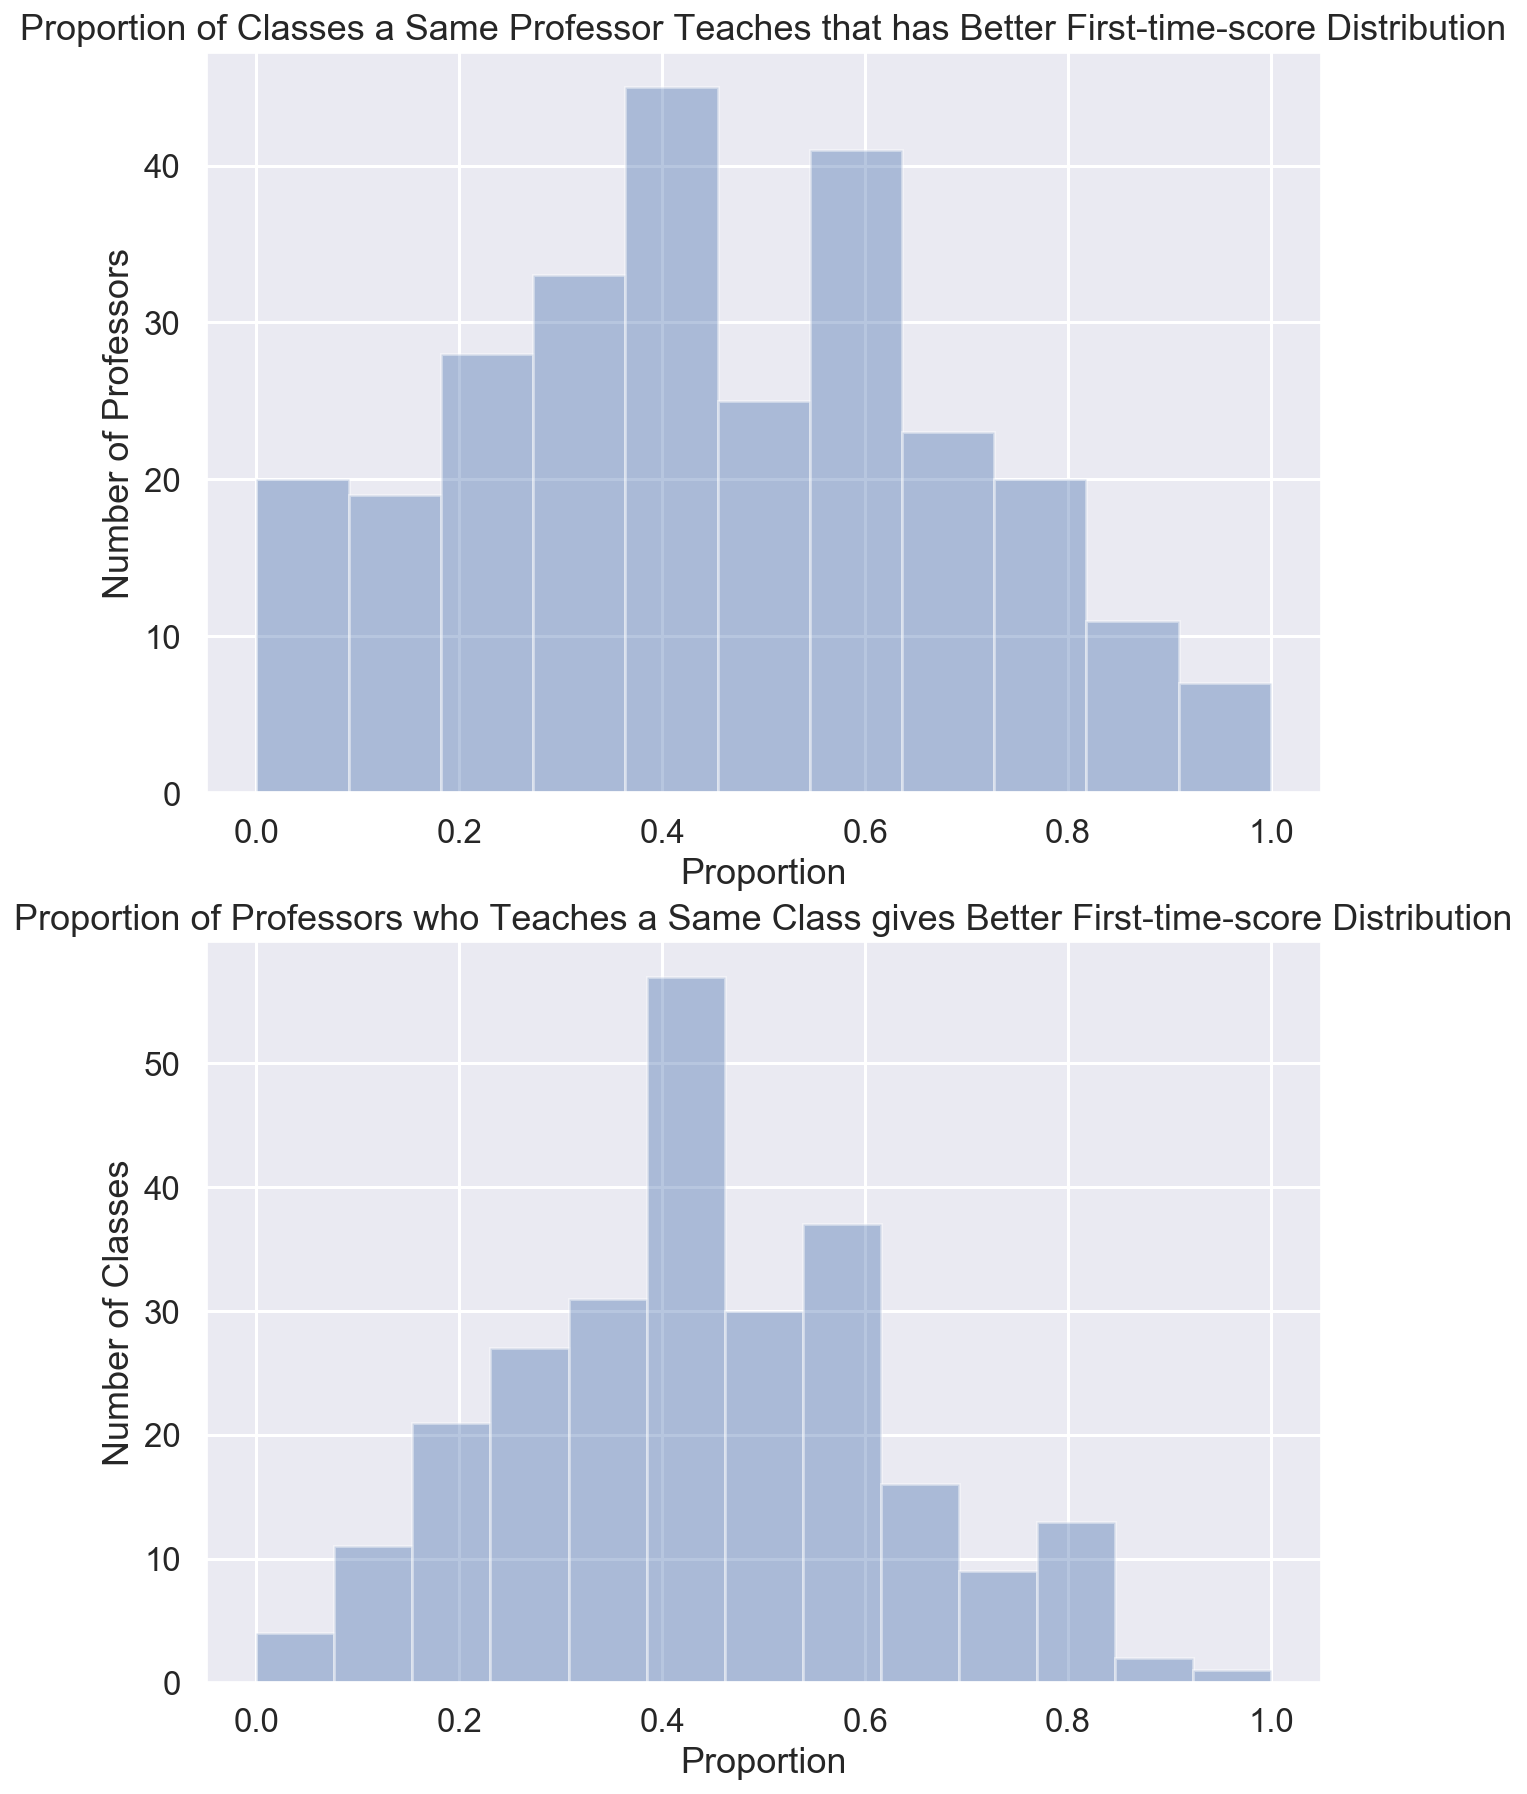

In [42]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
# Hack to show ylabel as counts for hist
sns.distplot(same_prof_better_score_pct, kde=False, ax=axes[0])
sns.distplot(same_course_better_score_pct, kde=False, ax=axes[1])
axes[0].set_title('Proportion of Classes a Same Professor Teaches that has Better First-time-score Distribution')
axes[0].set_xlabel('Proportion'); axes[0].set_ylabel('Number of Professors')
axes[1].set_title('Proportion of Professors who Teaches a Same Class gives Better First-time-score Distribution')
axes[1].set_xlabel('Proportion'); axes[1].set_ylabel('Number of Classes')

These two distributions are roughly normally distributed, although the proportion of classes a same professor teaches that's has better score first time has a distrution that's slightly left skewed. This could indicate there is a little trend that more professor tend to give lower scores the first time they teach their courses, than who tend to give better scores the first time. But still there is insufficient evidance to prove this.<br>

----

## Analysis Part 3: Quarter Difference Analysis

__Research Questions:__
1. Does the same class tend to give higher gpa if offered at a summer session?
2. Does the same class tend to have higher gpa in fall, winter or spring quarter?

__Exploratory Data Analysis:__<br>
In this part, we will just use the full CAPE dataset (`cape_df`) as it includes all information needed for this analysis.<br>
We will use variables `term`, `gpa_actual`, `course_mean` in our analysis. We start by exploring the distribution of those variables.<br>
We will also look at course sizes for all courses so we get an idea.

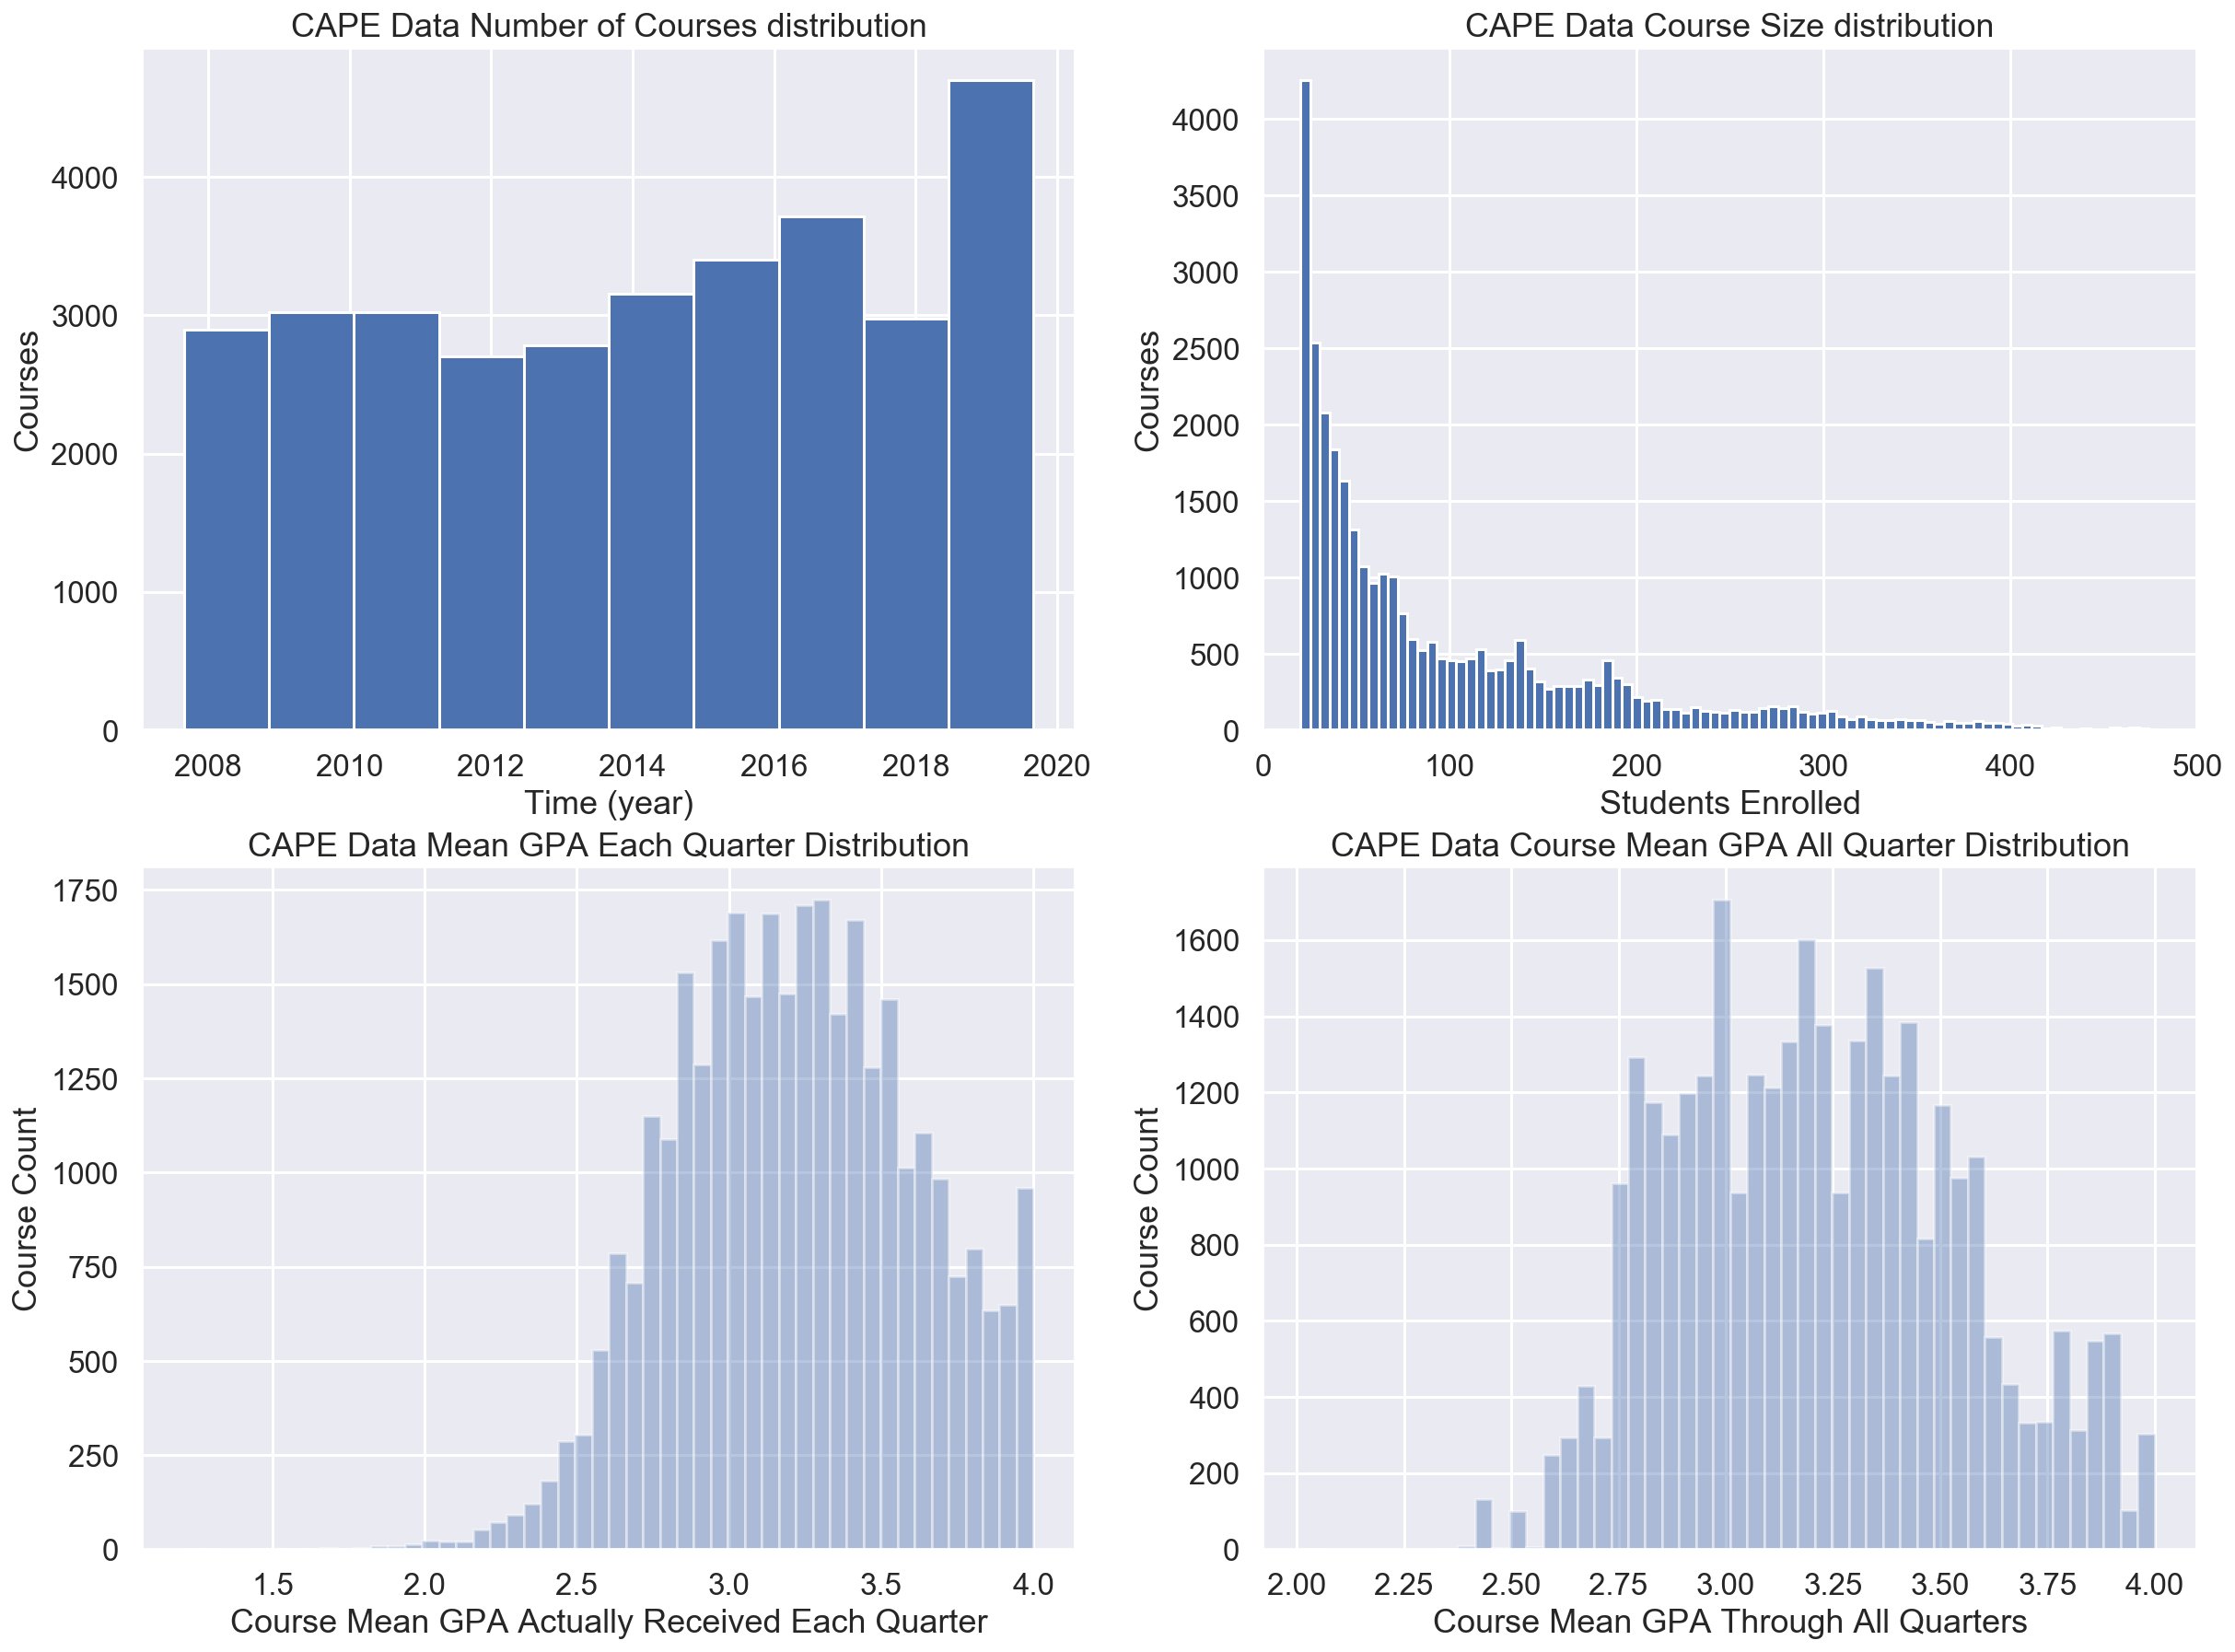

In [83]:
fig, axes = plt.subplots(2,2, figsize=(20,15))
axes[0,0].hist(cape_df['term_time']); axes[0,0].set_xlabel('Time (year)'); axes[0,0].set_ylabel('Courses'); axes[0,0].set_title('CAPE Data Number of Courses distribution')
axes[0,1].hist(cape_df['enroll'], bins=200); axes[0,1].set_xlabel('Students Enrolled'); axes[0,1].set_ylabel('Courses'); axes[0,1].set_title('CAPE Data Course Size distribution'); axes[0,1].set_xlim([0,500]);
sns.distplot(cape_df['gpa_actual'], ax=axes[1,0], kde=False); axes[1,0].set_xlabel('Course Mean GPA Actually Received Each Quarter'); axes[1,0].set_ylabel('Course Count'); axes[1,0].set_title('CAPE Data Mean GPA Each Quarter Distribution')
sns.distplot(cape_df['course_mean'], ax=axes[1,1], kde=False); axes[1,1].set_xlabel('Course Mean GPA Through All Quarters'); axes[1,1].set_ylabel('Course Count'); axes[1,1].set_title('CAPE Data Course Mean GPA All Quarter Distribution'); plt.show()

From the distribution plots, we can see number of courses offered is fairly consistent with a slowly increasing trend each year, and with a low on 2018.<br>
We observe that there are a lot of tiny classes (< 10 people) and those classes, because they are so small, may generate outliers in the term gpa and affect our data. We will proceed keeping this in mind.<br>
Course mean GPA is right skewed, peak at around 3.4 and at GPA=4.0 has a little peak. We suspect the peak at 4.0 are those courses with small size or seminar courses, etc, where there is little students and everyone gets A.<br>
Course gpa throughout all years is roughly normally distributed.

In order to see if students receive a better grade in certain quarter, we introduce the measure of `gpa_diff` calculated by average class gpa this quarter - average class gpa though all quarters. If this measure is positive, it means that students are receiving a better score this quarter comparing to others.<br>
We will visualize and compare different quarters using `boxplot` and `violinplot` on this `gpa_diff`, so that we can not only see distributions, but also compare different quarters / years.<br>
Since there are much more classes **and outliers** in normal quarters, we will use boxplot to visualize. There are less course in summer so we use violinplot to better visualize the distributions.

In [44]:
# Preprocess to find if it's FA, WI, SP or Summer, and calculate GPA difference
quarter_diff_df = cape_df.copy()
quarter_diff_df['quarter'] = quarter_diff_df['term'].apply(lambda x: x[:2])
quarter_diff_df['is_summer'] = (quarter_diff_df['quarter'] == 'S1') | (quarter_diff_df['quarter'] == 'S2') | (quarter_diff_df['quarter'] == 'S3')
quarter_diff_summer_df = quarter_diff_df[quarter_diff_df['is_summer'] == True]
quarter_diff_df['gpa_diff'] = quarter_diff_df['gpa_actual'] - quarter_diff_df['course_mean']

Just double checking, the gpa_diff we introduced is normally distributed. Since it's normally distributed, we can say if the median is more than 0 for one quarter, the quarter has a slighter better GPA for all courses compared to all others.

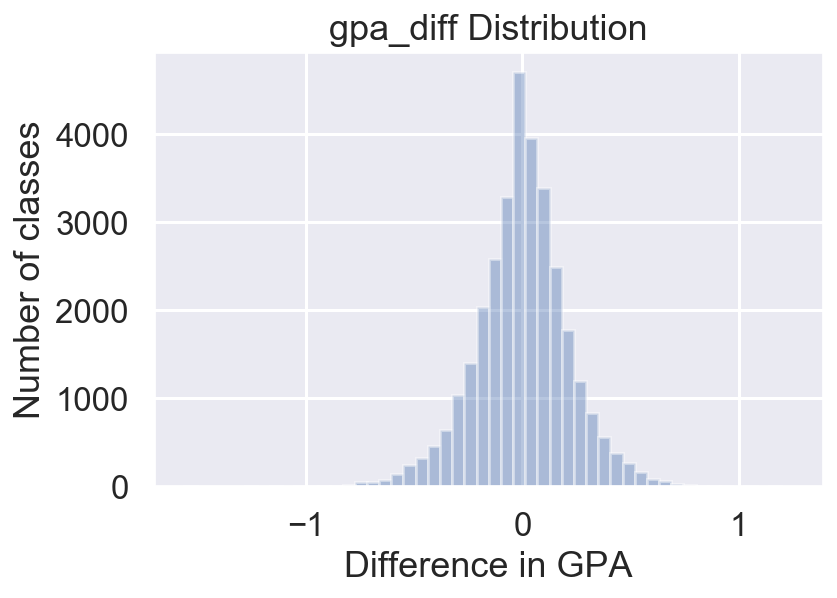

In [90]:
sns.distplot(quarter_diff_df['gpa_diff'], kde=False); plt.title('gpa_diff Distribution'); plt.xlabel('Difference in GPA'); plt.ylabel('Number of classes'); plt.show()

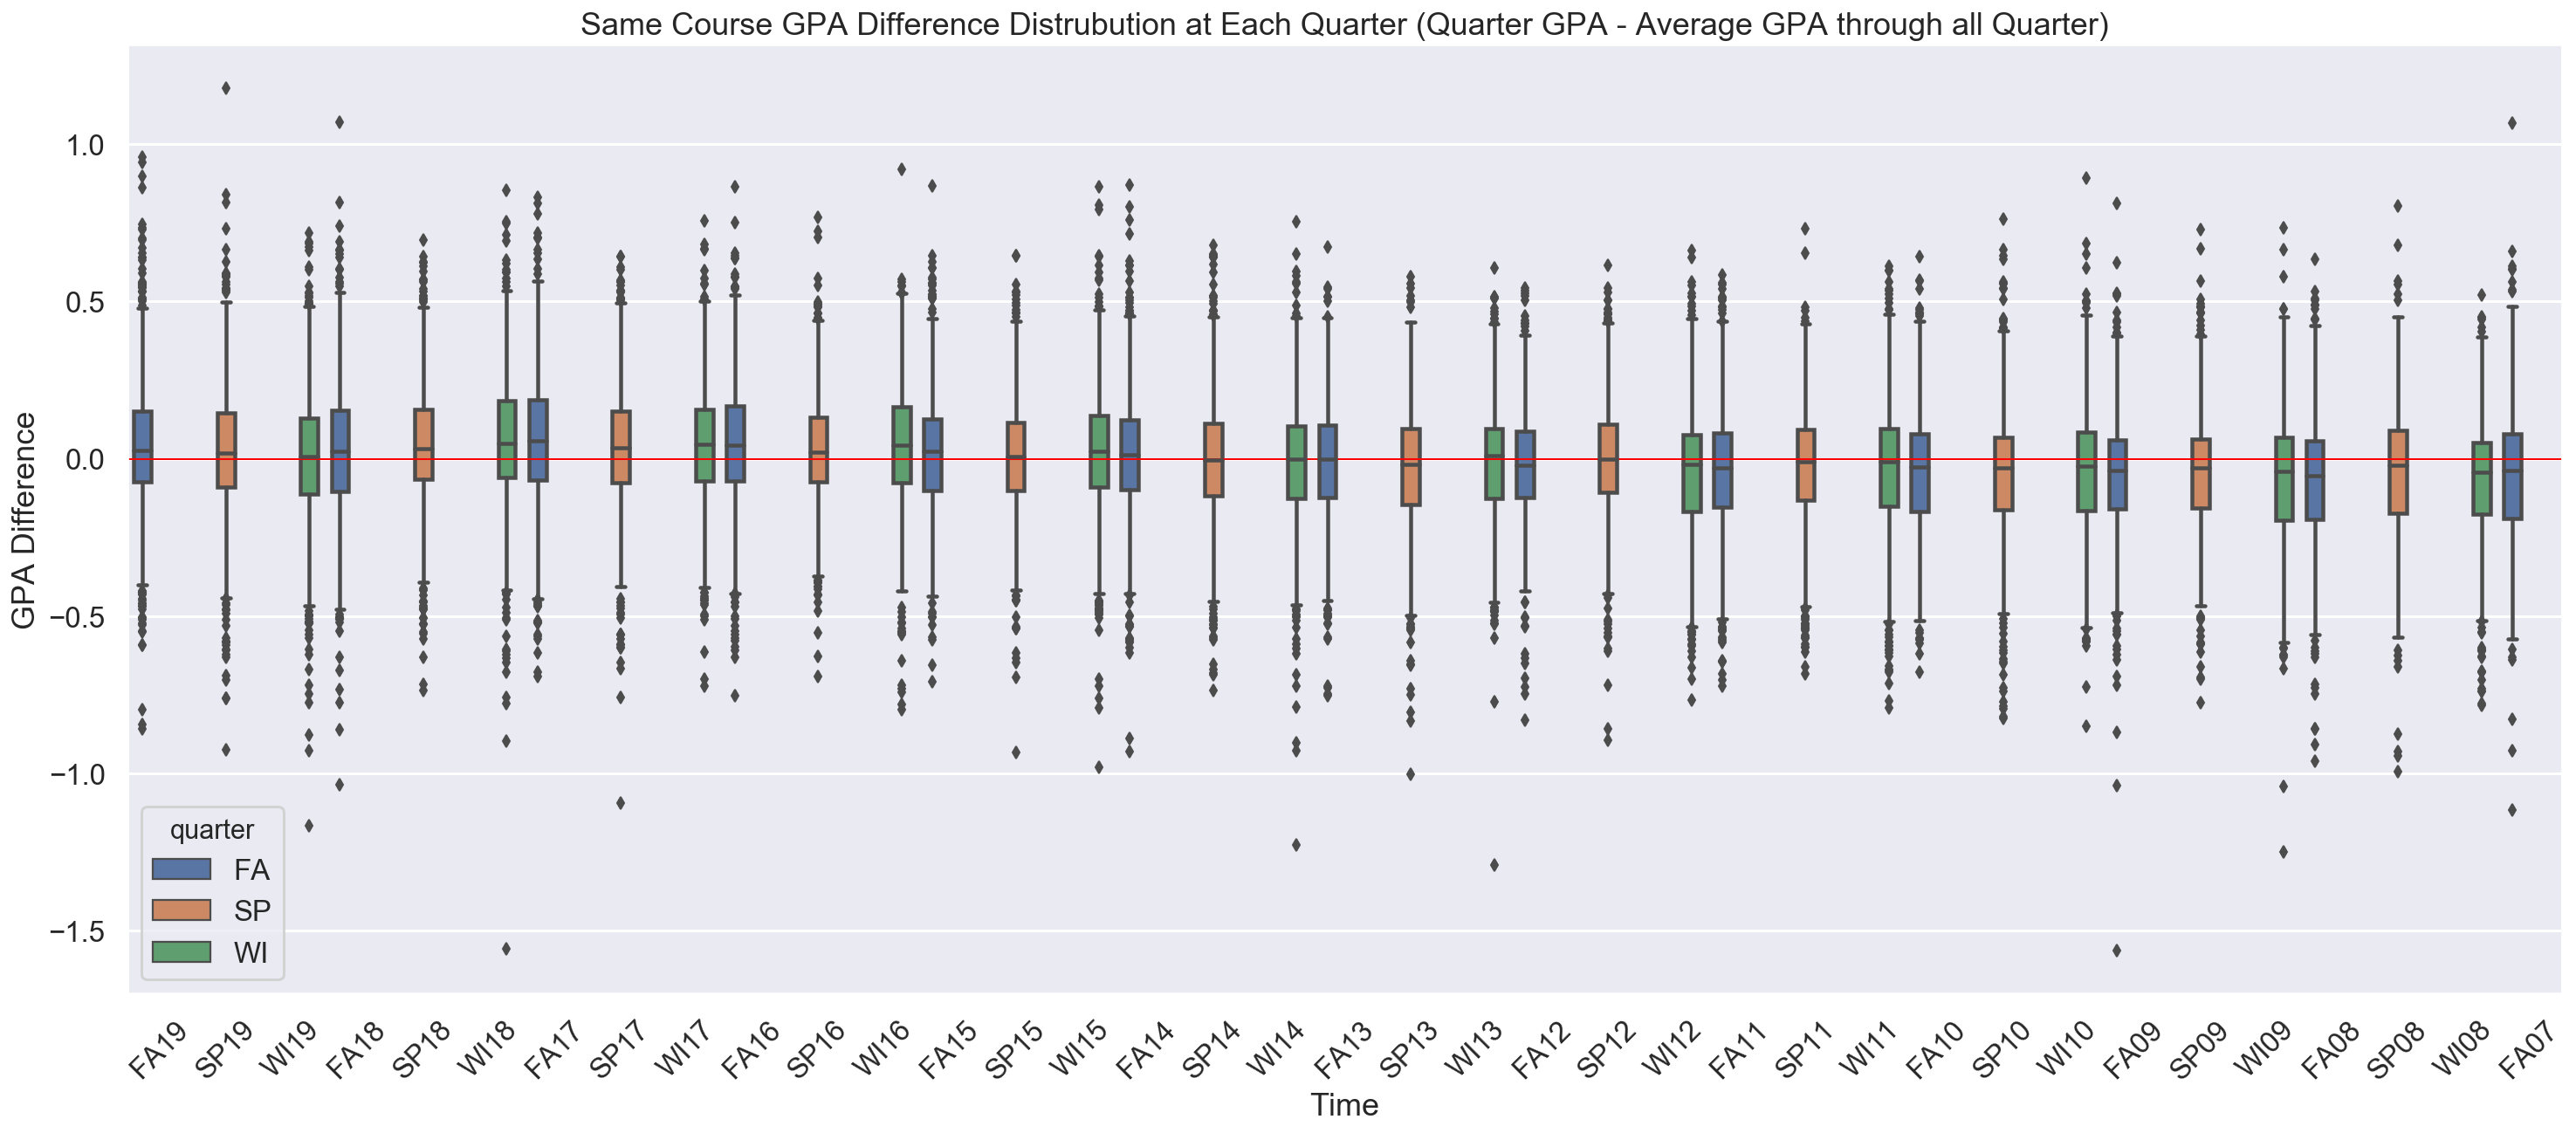

In [71]:
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
sns.boxplot(data=quarter_diff_df[quarter_diff_df['is_summer'] == False],
            x='term', y='gpa_diff', hue='quarter', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.axhline(y=0, linewidth=1, color='red')
plt.title('Same Course GPA Difference Distrubution at Each Quarter (Quarter GPA - Average GPA through all Quarter)'); plt.xlabel('Time'); plt.ylabel('GPA Difference'); plt.show()

Looking at the above plots, we can see a lot of outliers and that is expected because there are a lot of tiny courses, and those course's GPA can vary a lot because the amount of students taking into this calculation is small.<br>
As we look at the overall trend, we can see in early years (before 2014), courses tend to have a slightly less gpa than the same course's average over all years. Course's GPA are slowly increasing over the years with a peak at 2018.<br>
However, although there are slight difference in GPA at different quarter, there is no trend on this difference. Thus we will reject our hypothesis that fall quarter has a better gpa than spring.

Next we will look at if summer shows a better GPA than other quarters. We will still use this `gpa_diff` measure. If they all show to be positive, that means summer indeed has a better GPA than same course offered in normal quarters.

In [84]:
# Explore our summer data
s1_records = sum(quarter_diff_df['quarter'] == 'S1')
s2_records = sum(quarter_diff_df['quarter'] == 'S2')
s3_records = sum(quarter_diff_df['quarter'] == 'S3')
print(f"Records:\nSummer Session I: {s1_records}, Summer Session II: {s2_records}, Summer Session III: {s3_records}")

Records:
Summer Session I: 1668, Summer Session II: 1347, Summer Session III: 42


As we can see, Summer Session I and II has fair amount of data to analyze, but Summer Session III (Special Summer Session) has little data insufficient to make reasonable conclusions. Thus we will drop S3 data from this analysis

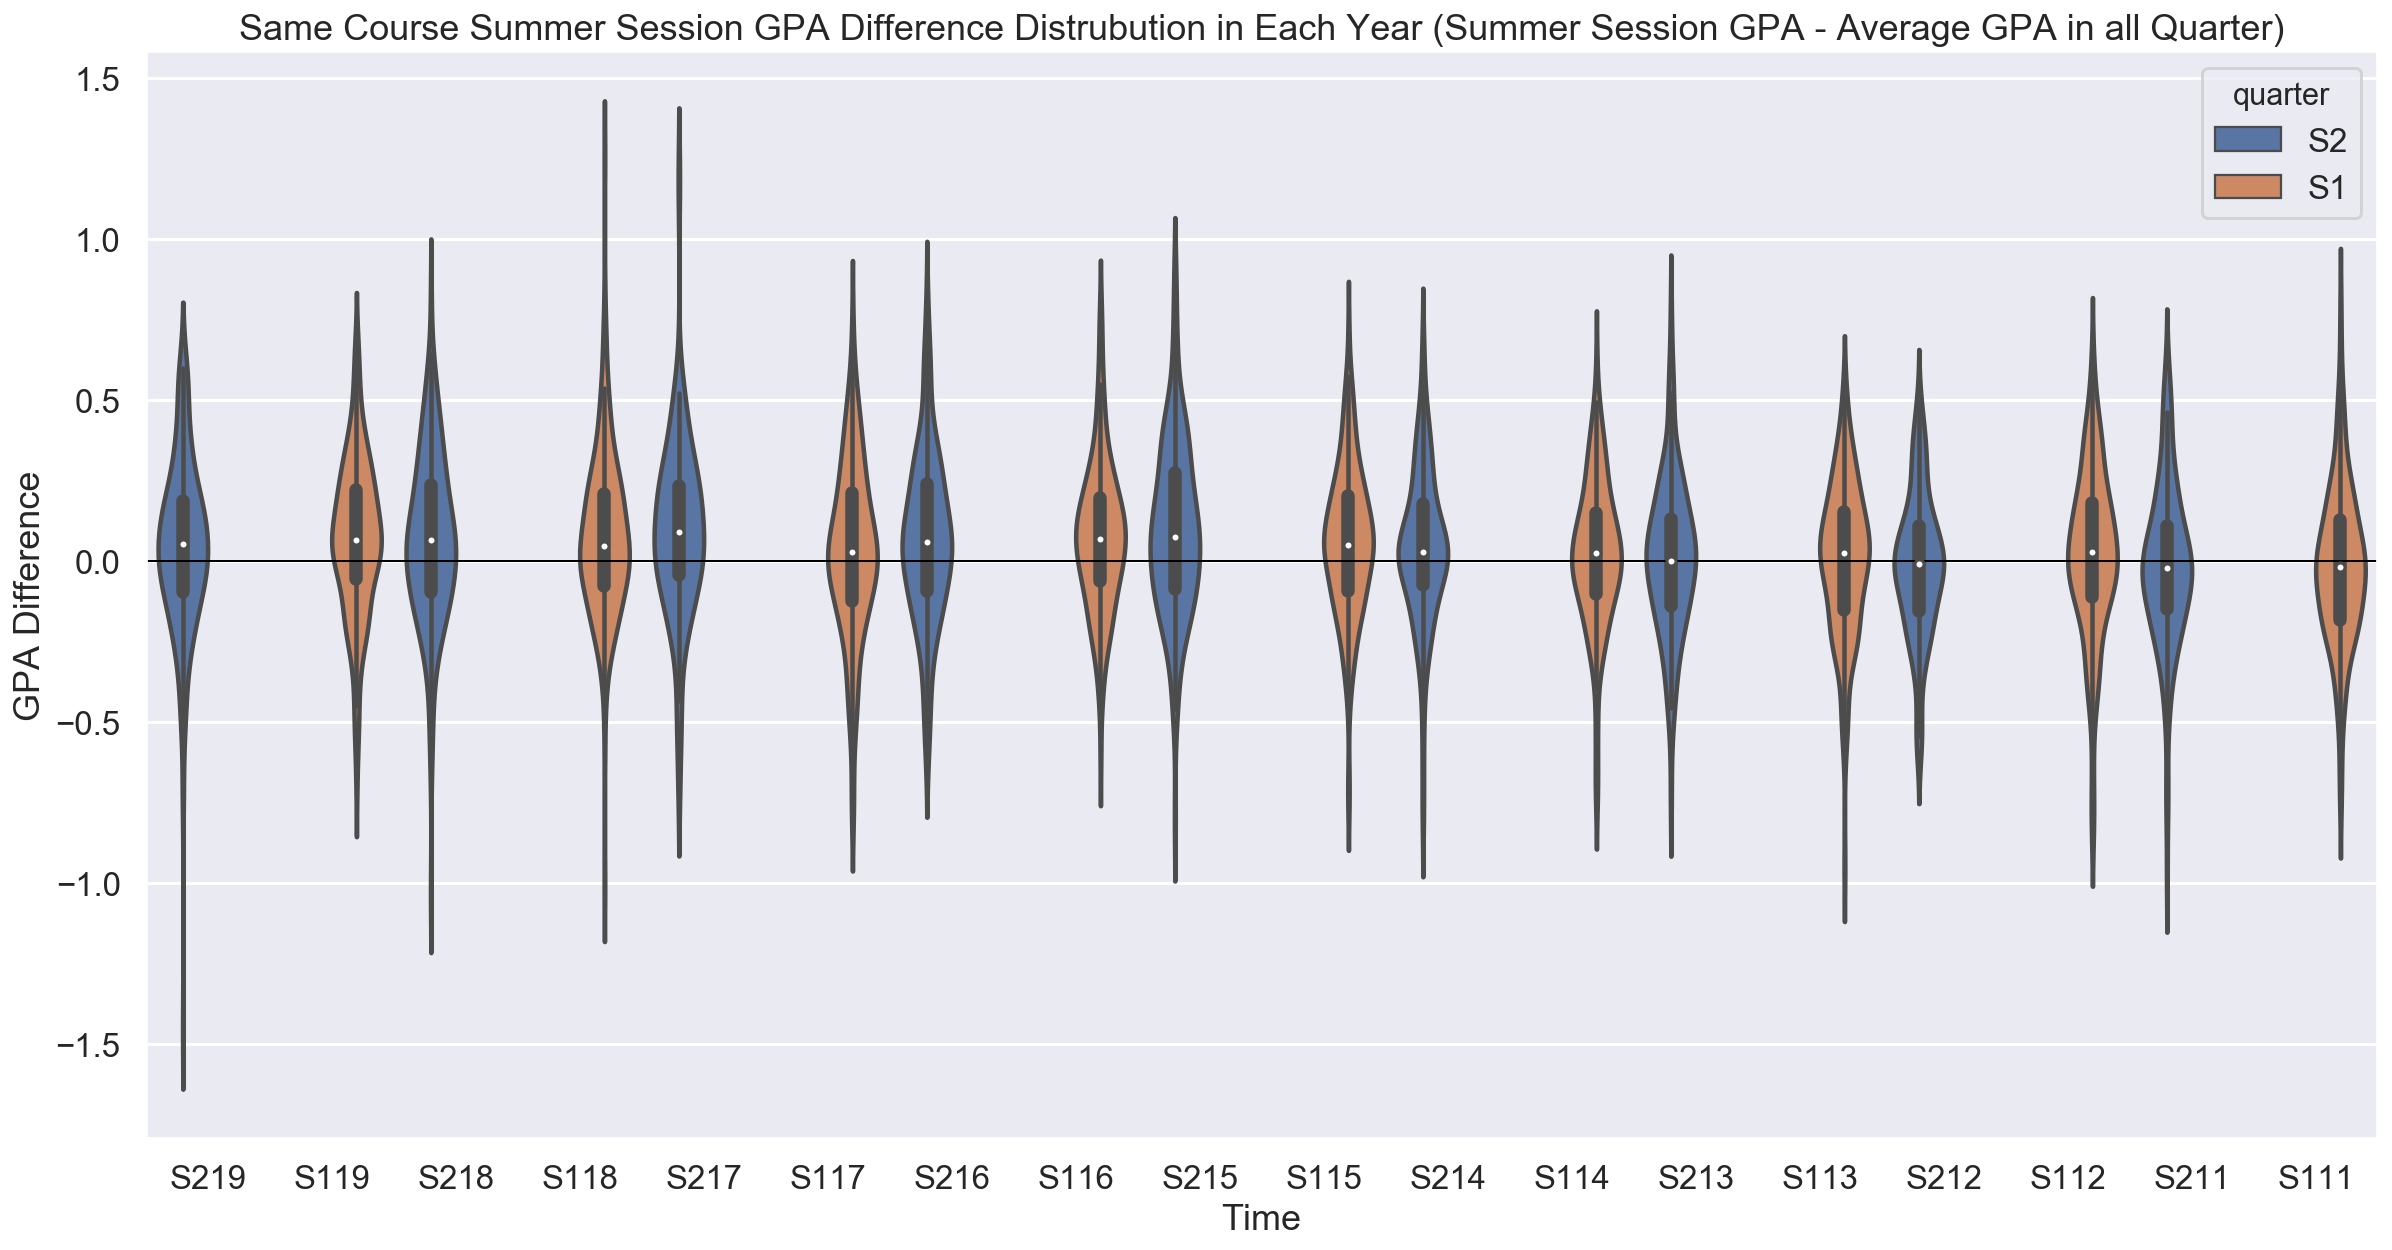

Note: S1: Summer Session I (July), S2: Summer Session II (August)


In [85]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
sns.violinplot(data=quarter_diff_df[(quarter_diff_df['is_summer'] == True) & (quarter_diff_df['quarter'] != 'S3')], x='term', y='gpa_diff', hue='quarter', ax=ax)
plt.axhline(y=0, linewidth=1, color='black')
plt.title('Same Course Summer Session GPA Difference Distrubution in Each Year (Summer Session GPA - Average GPA in all Quarter)'); plt.xlabel('Time'); plt.ylabel('GPA Difference'); plt.show()
print('Note: S1: Summer Session I (July), S2: Summer Session II (August)')

As we can see, after summer sessions starts to be offered at 2011, the first two summer sessions in 2011 actually has slightly lower grades than the same course average, but after that, every year summer session courses tend to have a better gpa than same course average overall as their medium is above 0. This we can say that there is indeed a small trend that summer sessions have better GPAs, but the difference is very small as shown on the plot.

----

## Analysis Part 4: Recommendation Analysis

__Research Questions:__
1) Is GPA correlated with recommended class/instructor rate?
2) Is GPA correlated with Rate My Professor Rating scores?

First, extract data of class recommendation rate, instructor recommendation rate, RateMyProfessor score and GPA for each class.

In [48]:
df_rcmnd_analysis = all_df[['rcmnd_class', 'rcmnd_instr', 'rmp_score', 'gpa_actual']]

In [49]:
df_rcmnd_analysis

,rcmnd_class,rcmnd_instr,rmp_score,gpa_actual
index,,,,
157,0.489,0.600,3.46,3.33
158,0.589,0.357,3.46,2.70
159,0.644,0.548,3.46,3.14
160,0.588,0.423,3.46,2.94
161,0.400,0.364,3.46,3.05
...,...,...,...,...
19533,1.000,0.800,4.05,3.79
19536,0.929,1.000,4.05,3.63
19539,0.727,0.636,4.05,3.71


Then, test normality of our data since regression assumes normal distribution. (Plot of distribution of GPA is in part 2 above)

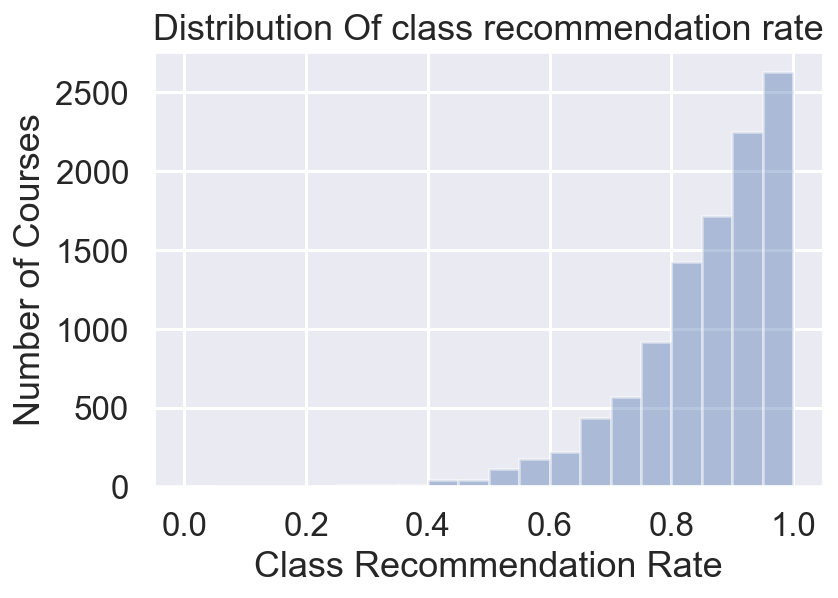

In [50]:
sns.distplot(df_rcmnd_analysis['rcmnd_class'], bins=20, kde=False);
plt.title('Distribution Of class recommendation rate');
plt.xlabel('Class Recommendation Rate');
plt.ylabel('Number of Courses');

The histogram above for rcmnd_class is left skewed. rcmnd_class is not normally distributed.

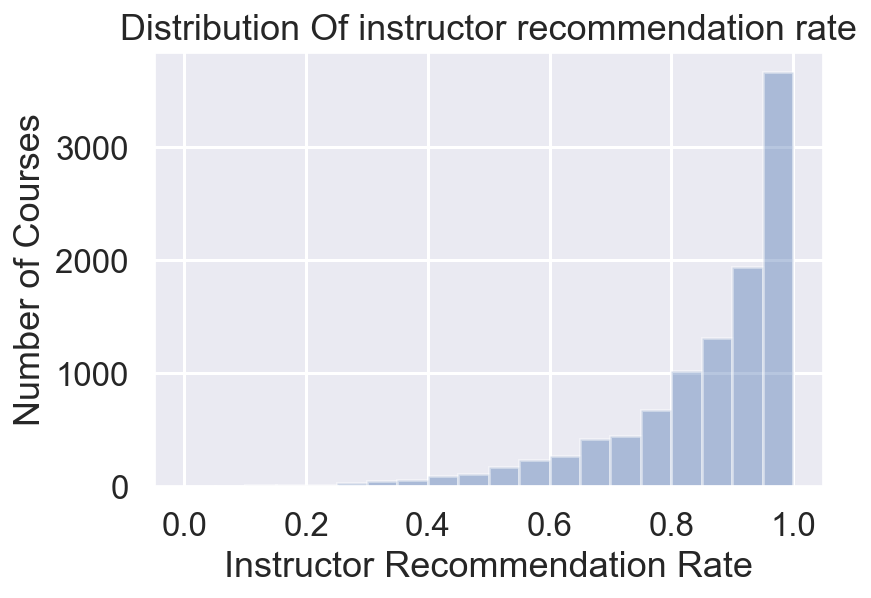

In [51]:
sns.distplot(df_rcmnd_analysis['rcmnd_instr'], bins=20, kde=False);
plt.title('Distribution Of instructor recommendation rate');
plt.xlabel('Instructor Recommendation Rate');
plt.ylabel('Number of Courses');

The histogram above for rcmnd_instr is left skewed. rcmnd_instr is not normally distributed.

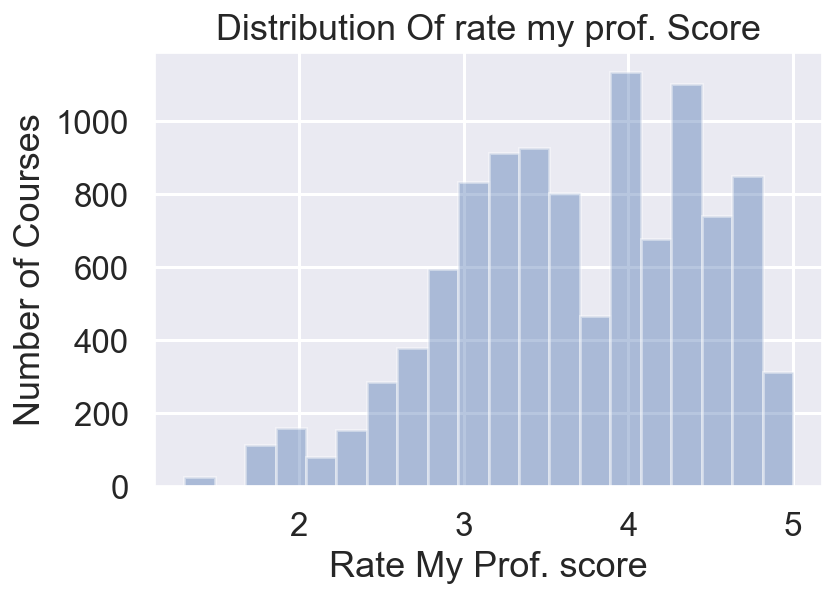

In [52]:
sns.distplot(df_rcmnd_analysis['rmp_score'], bins=20, kde=False);
plt.title('Distribution Of rate my prof. Score');
plt.xlabel('Rate My Prof. score');
plt.ylabel('Number of Courses');

The histogram above for rmp_score is approaching normal, so we need to run normal test to confirm.

In [53]:
stats.normaltest(df_rcmnd_analysis['rmp_score'])

NormaltestResult(statistic=393.4558106289067, pvalue=3.648852311831241e-86)

The normal test tells us that rmp_score is not normally distributed.

The histogram for rcmnd_class and rcmnd_instr are left skewed. We guess that it is because most students are satisfied with their instructor/class and thus recommend it. The histogram for rmp_score is approaching normal but still a little bit left skewed. We guess that it is because students tend to give their professor average and above average ratings on RateMyProfessor. Since independent variables are not normally distributed, we use generalized linear model instead of OLS model.

Then, we run linear regression of GPA on class recommendation rate, instructor recommendation rate and Rate My Professor srcores, respectively, to see the correlations.

                 Generalized Linear Model Regression Results                  
Dep. Variable:             gpa_actual   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10550
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12737
Method:                          IRLS   Log-Likelihood:                -4099.8
Date:                Thu, 19 Mar 2020   Deviance:                       1343.8
Time:                        23:11:09   Pearson chi2:                 1.34e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4618      0.025     96.977      

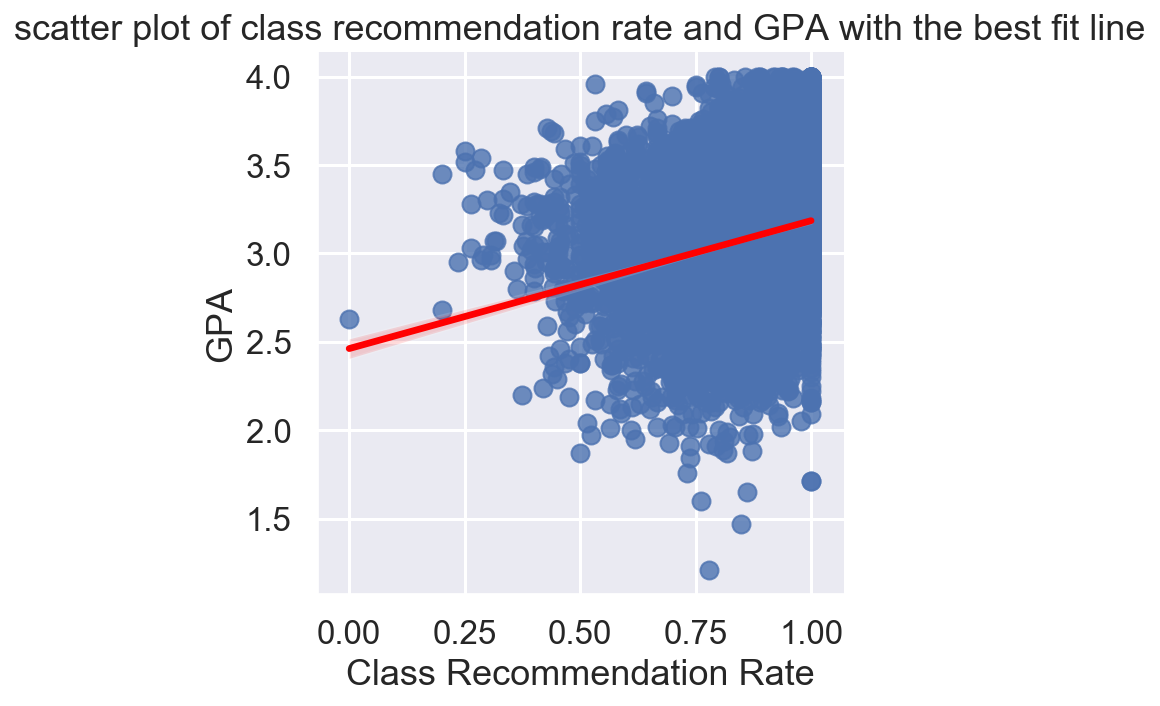

In [54]:
outcome_class, predictors_class = patsy.dmatrices("gpa_actual ~ rcmnd_class", df_rcmnd_analysis)

mod_class = sm.GLM(outcome_class, predictors_class)
res_class = mod_class.fit()
print(res_class.summary())

sns.lmplot(x='rcmnd_class', y='gpa_actual', data=df_rcmnd_analysis, fit_reg=True, line_kws={'color':'red'})
plt.title('scatter plot of class recommendation rate and GPA with the best fit line')
plt.xlabel('Class Recommendation Rate')
plt.ylabel('GPA');

Because p-value is 0, class recommendation rate is significant to predict GPA. Because the coefficient/slope for rcmnd_class is positive, class recommendation rate is positively correlated with GPA.

                 Generalized Linear Model Regression Results                  
Dep. Variable:             gpa_actual   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10550
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12575
Method:                          IRLS   Log-Likelihood:                -4032.3
Date:                Thu, 19 Mar 2020   Deviance:                       1326.7
Time:                        23:11:12   Pearson chi2:                 1.33e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5521      0.020    129.756      

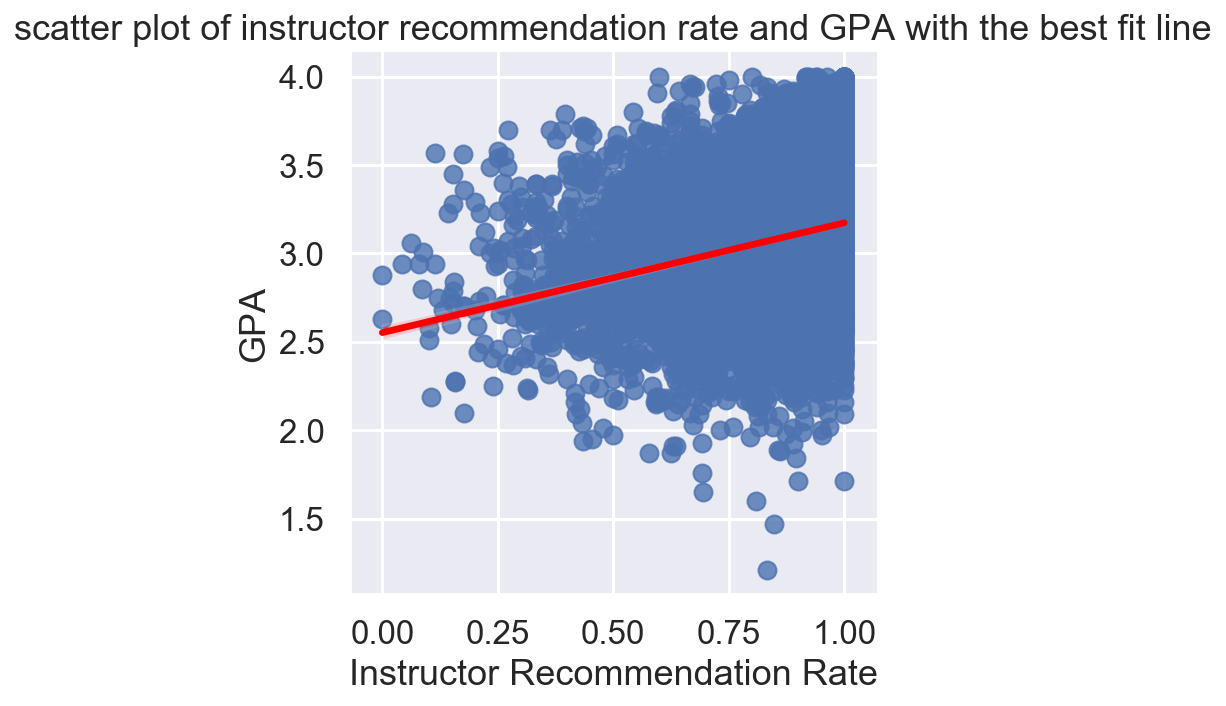

In [55]:
outcome_instr, predictors_instr = patsy.dmatrices("gpa_actual ~ rcmnd_instr", df_rcmnd_analysis)

mod_instr = sm.GLM(outcome_instr, predictors_instr)
res_instr = mod_instr.fit()
print(res_instr.summary())

sns.lmplot(x='rcmnd_instr', y='gpa_actual', data=df_rcmnd_analysis, fit_reg=True, line_kws={'color':'red'})
plt.title('scatter plot of instructor recommendation rate and GPA with the best fit line')
plt.xlabel('Instructor Recommendation Rate')
plt.ylabel('GPA');

Because p-value is 0, instructor recommendation rate is significant to predict GPA. Because the coefficient/slope for rcmnd_instr is positive, instructor recommendation rate is positively correlated with GPA.

                 Generalized Linear Model Regression Results                  
Dep. Variable:             gpa_actual   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10550
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12733
Method:                          IRLS   Log-Likelihood:                -4097.7
Date:                Thu, 19 Mar 2020   Deviance:                       1343.3
Time:                        23:11:14   Pearson chi2:                 1.34e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6600      0.017    152.472      0.0

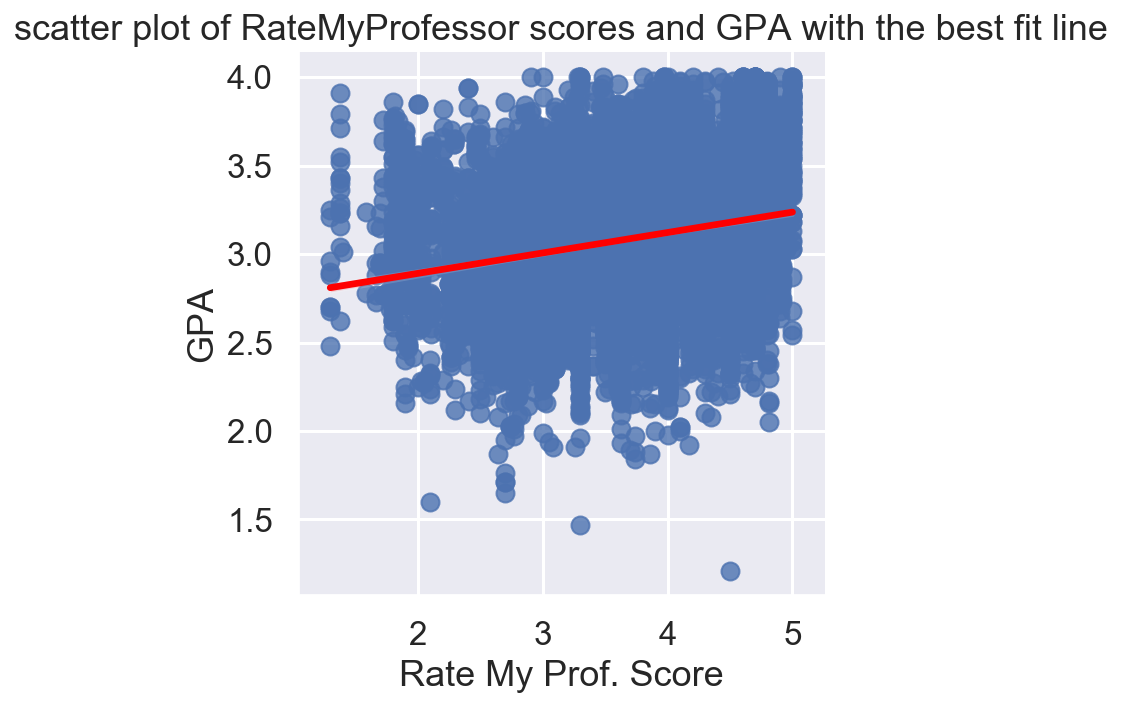

In [56]:
outcome_rmp, predictors_rmp = patsy.dmatrices("gpa_actual ~ rmp_score", df_rcmnd_analysis)

mod_rmp = sm.GLM(outcome_rmp, predictors_rmp)
res_rmp = mod_rmp.fit()
print(res_rmp.summary())

sns.lmplot(x='rmp_score', y='gpa_actual', data=df_rcmnd_analysis, fit_reg=True, line_kws={'color':'red'})
plt.title('scatter plot of RateMyProfessor scores and GPA with the best fit line')
plt.xlabel('Rate My Prof. Score')
plt.ylabel('GPA');

Because p-value is 0, Rate My Professor score is significant to predict GPA. Because the coefficient/slope for rmp_score is positive, Rate My Professor score is positively correlated with GPA.

We want to run linear regression on class recommendation rate, instructor recommendation rate and Rate My Professor srcores, together. But before running the regression, we need to test the collinearity of independent variables.

In [57]:
outcome_1, predictors_1 = patsy.dmatrices("rcmnd_class ~ rcmnd_instr", df_rcmnd_analysis)
mod_1 = sm.GLM(outcome_1, predictors_1)
res_1 = mod_1.fit()

outcome_2, predictors_2 = patsy.dmatrices("rcmnd_class ~ rmp_score", df_rcmnd_analysis)
mod_2 = sm.GLM(outcome_2, predictors_2)
res_2 = mod_2.fit()

outcome_3, predictors_3 = patsy.dmatrices("rcmnd_instr ~ rmp_score", df_rcmnd_analysis)
mod_3 = sm.GLM(outcome_3, predictors_3)
res_3 = mod_3.fit()

print('Linear regression of class recommendation rate on instructor recommendation rate:\n')
print(res_1.summary())
print('\n\nLinear regression of class recommendation rate on Rate My Professor srcores:\n')
print(res_2.summary())
print('\n\nLinear regression of instructor recommendation rate on Rate My Professor srcores:\n')
print(res_3.summary())

Linear regression of class recommendation rate on instructor recommendation rate:

                 Generalized Linear Model Regression Results                  
Dep. Variable:            rcmnd_class   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10550
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0088323
Method:                          IRLS   Log-Likelihood:                 9980.3
Date:                Thu, 19 Mar 2020   Deviance:                       93.181
Time:                        23:11:17   Pearson chi2:                     93.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

Since in each regression above, p-value is 0, we can know that all independent variables are correlated with each other. Since there is collinearity, ther is no need to run linear regression on all independent variables togther.

Therefore, class recommendation rate, instructor recommendation rate and Rate My Professor srcores are significant to predict GPA. In other words, there is a correlation between GPA and recommendation/rating scores. And the correlation is positive, which means the higher the recommendation rate and the rating scores of a class/instructor are, the easier students get high GPA from the course. This conclusion has met our hypothesis.

----

## Analysis Part 5: Prerequisite Analysis

__Research Questions:__
1. Does the number of prerequisites a course has (`prereq_count`) affect its average GPA (`gpa_actual`)?
2. Does the number of times that a course serves as a prerequisite for other courses (`prereqed_count`) affect its average GPA (`gpa_actual`)?
3. Does a combination of the above two variables affect a course's average GPA (`gpa_actual`)?

__Exploratory Data Analysis__

The variables that are involved in Research Question 1 and 2 are `prereq_count`, `prereqed_count`, and `gpa_actual`.
<br>For Research Question 3, we defind `prereq_sum` to be the sum of `prereq_count` and `prereqed_count`. Also, we define `prereq_diff` to be `prereq_count` - `prereqed_count`.

In [58]:
all_df['prereq_sum'] = all_df['prereq_count'] + all_df['prereqed_count']
all_df['prereq_diff'] = all_df['prereq_count'] - all_df['prereqed_count']

First we use distplots to visualize the distribution of each variable.

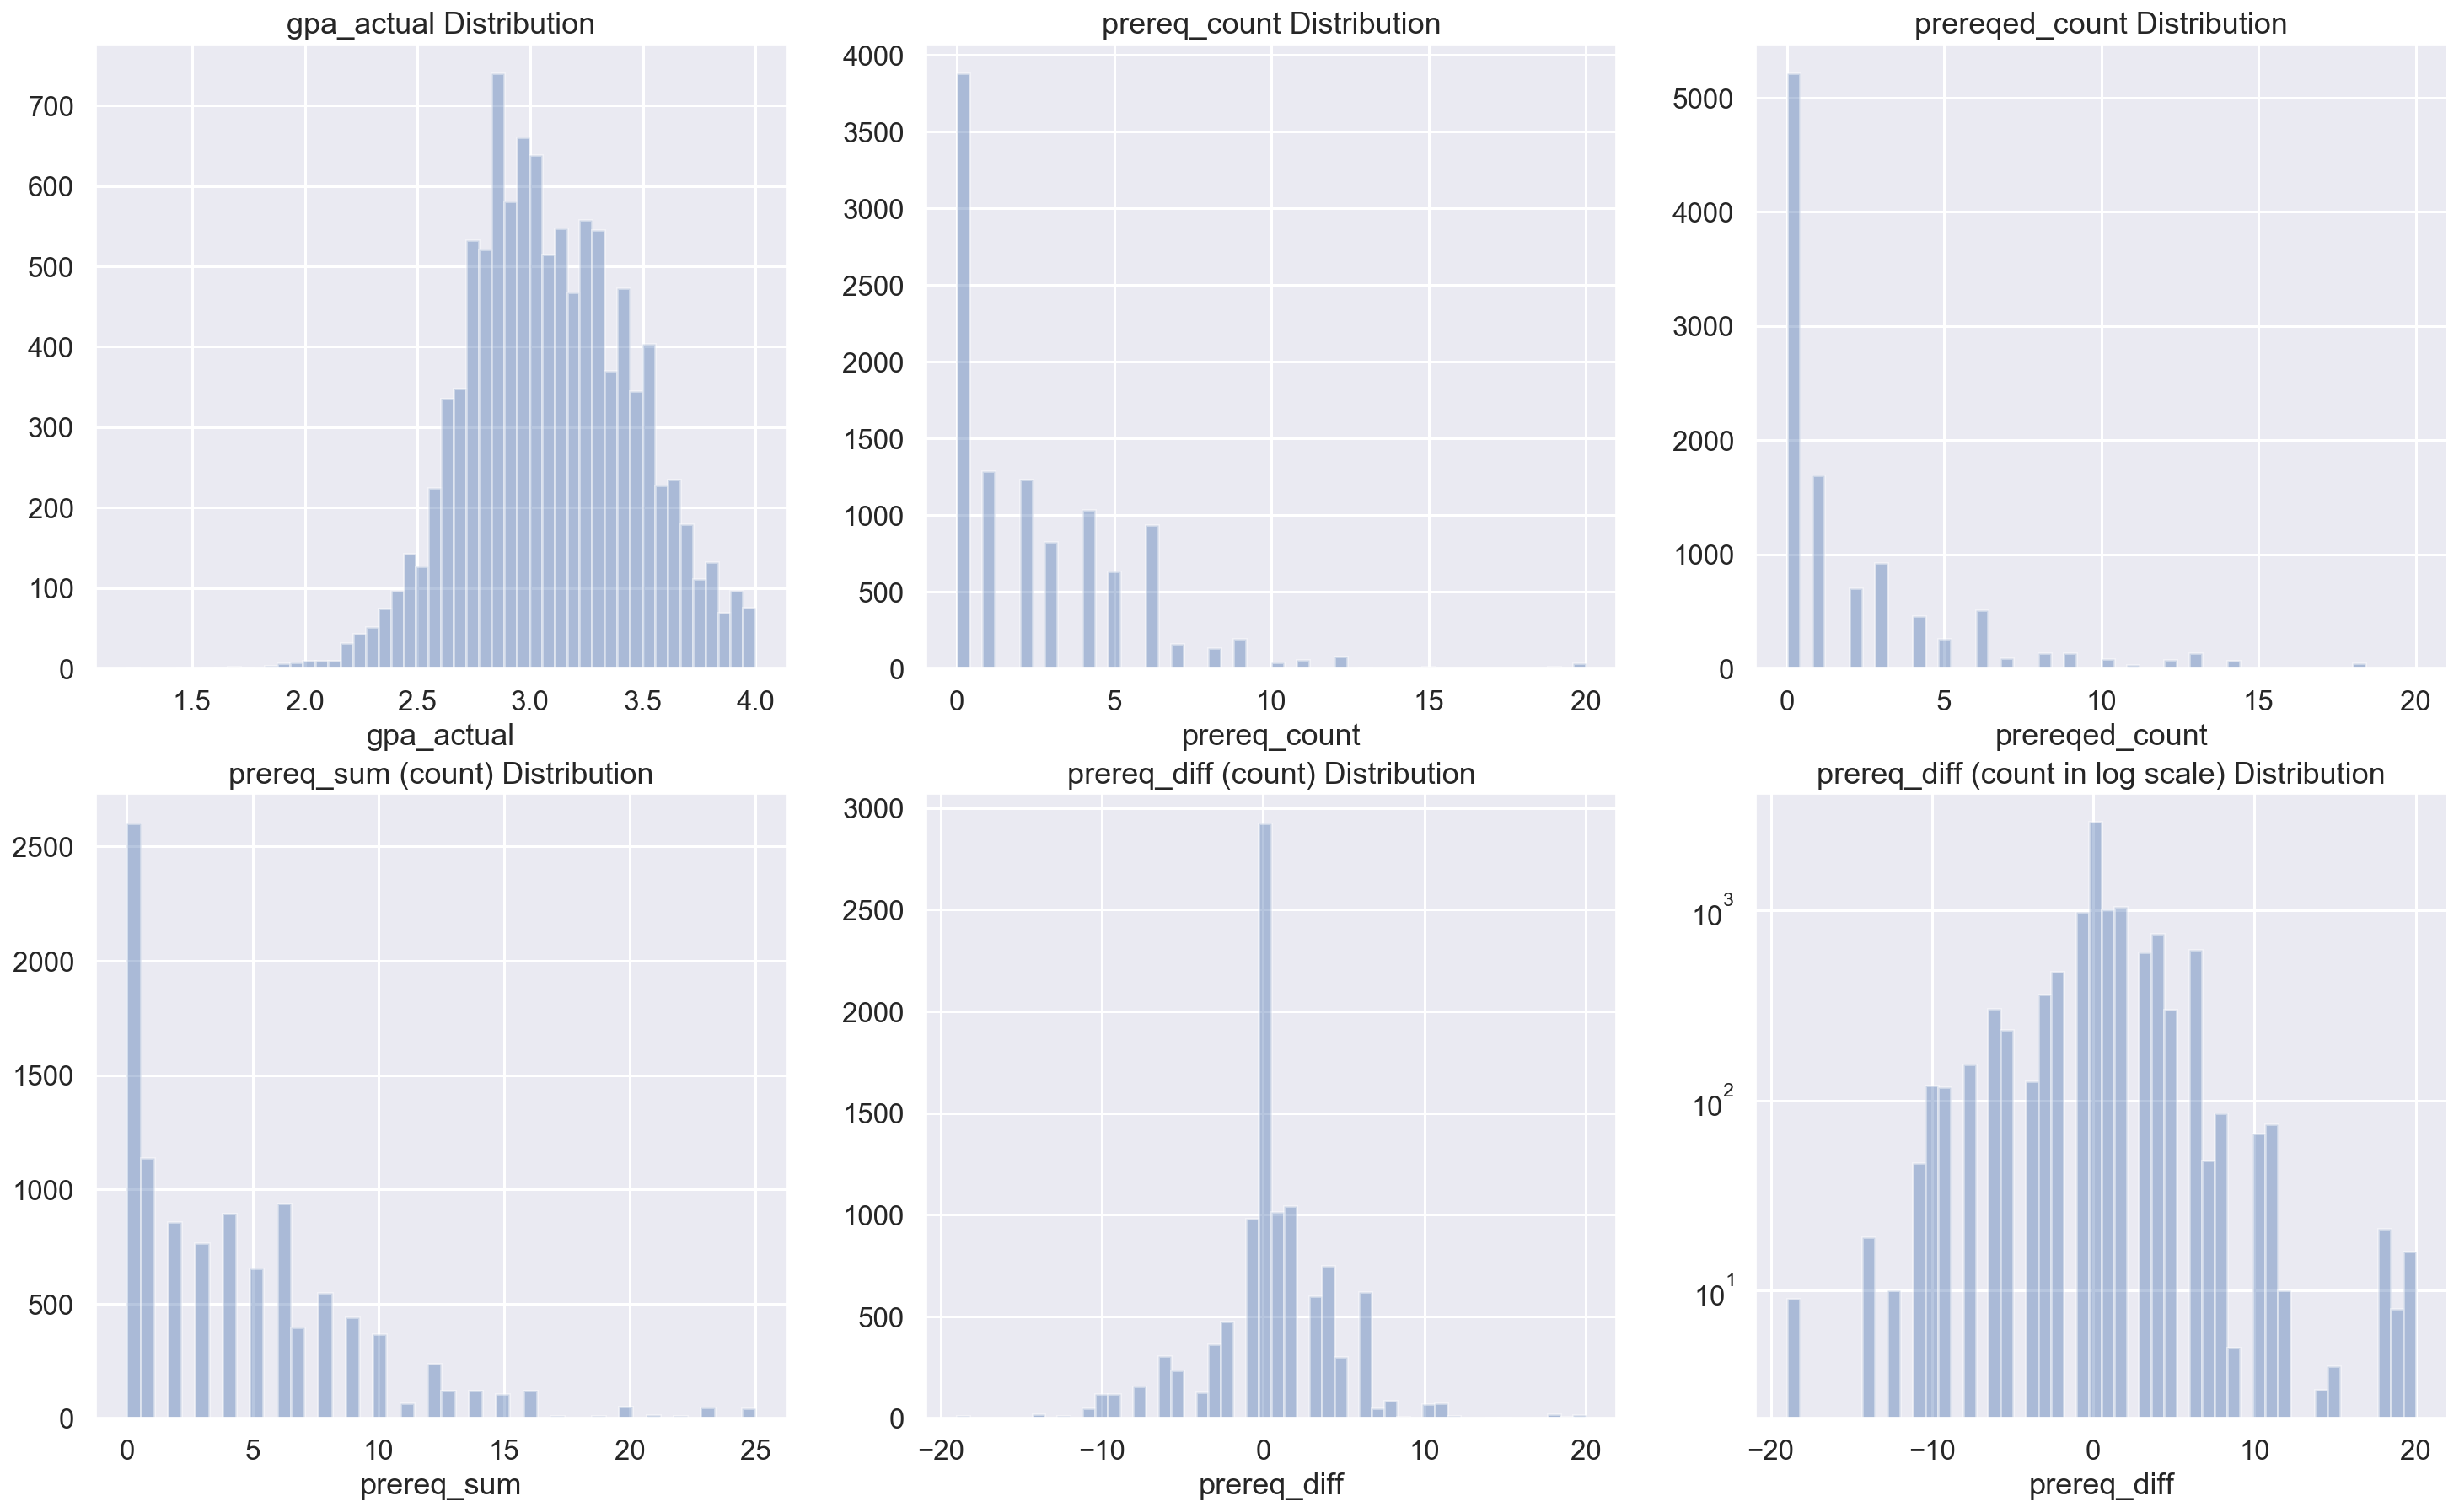

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))
sns.distplot(all_df['gpa_actual'], ax=axes[0][0], kde = False)
sns.distplot(all_df['prereq_count'], ax=axes[0][1], kde = False)
sns.distplot(all_df['prereqed_count'], ax=axes[0][2], kde = False)
sns.distplot(all_df['prereq_sum'], ax=axes[1][0], kde = False)
sns.distplot(all_df['prereq_diff'], ax=axes[1][1], kde = False)
plt.yscale('log')
sns.distplot(all_df['prereq_diff'], ax=axes[1][2], kde = False)
axes[0][0].set_title('gpa_actual Distribution');
axes[0][1].set_title('prereq_count Distribution');
axes[0][2].set_title('prereqed_count Distribution');
axes[1][0].set_title('prereq_sum (count) Distribution');
axes[1][1].set_title('prereq_diff (count) Distribution');
axes[1][2].set_title('prereq_diff (count in log scale) Distribution');

From the distplots above, we see that `gpa_actual` roughly follows a normal distribution.
<br>`prereq_count`, `prereqed_count`, and `prereq_sum` are all highly right skewed. (We have attempted to transform them to normal distributions with root, log, reciprocal, and boxcox transforms but non of these methods worked). However, they all follow poisson distributions.
<br>`prereq_diff` has an extreme high peak at 0, which is to be expected because a lot of courses have no prerequisites (the next cell shows the exact number). But if we log transform the y-axis, as was done for the bottom-right plot, we see that it roughly follows a normal distribution.

Next, we use boxplots to visualize the linearity of the correlations between `gpa_actual` and `prereq_count`, `prereqed_count`, `prereq_sum`, and `prereq_diff`.

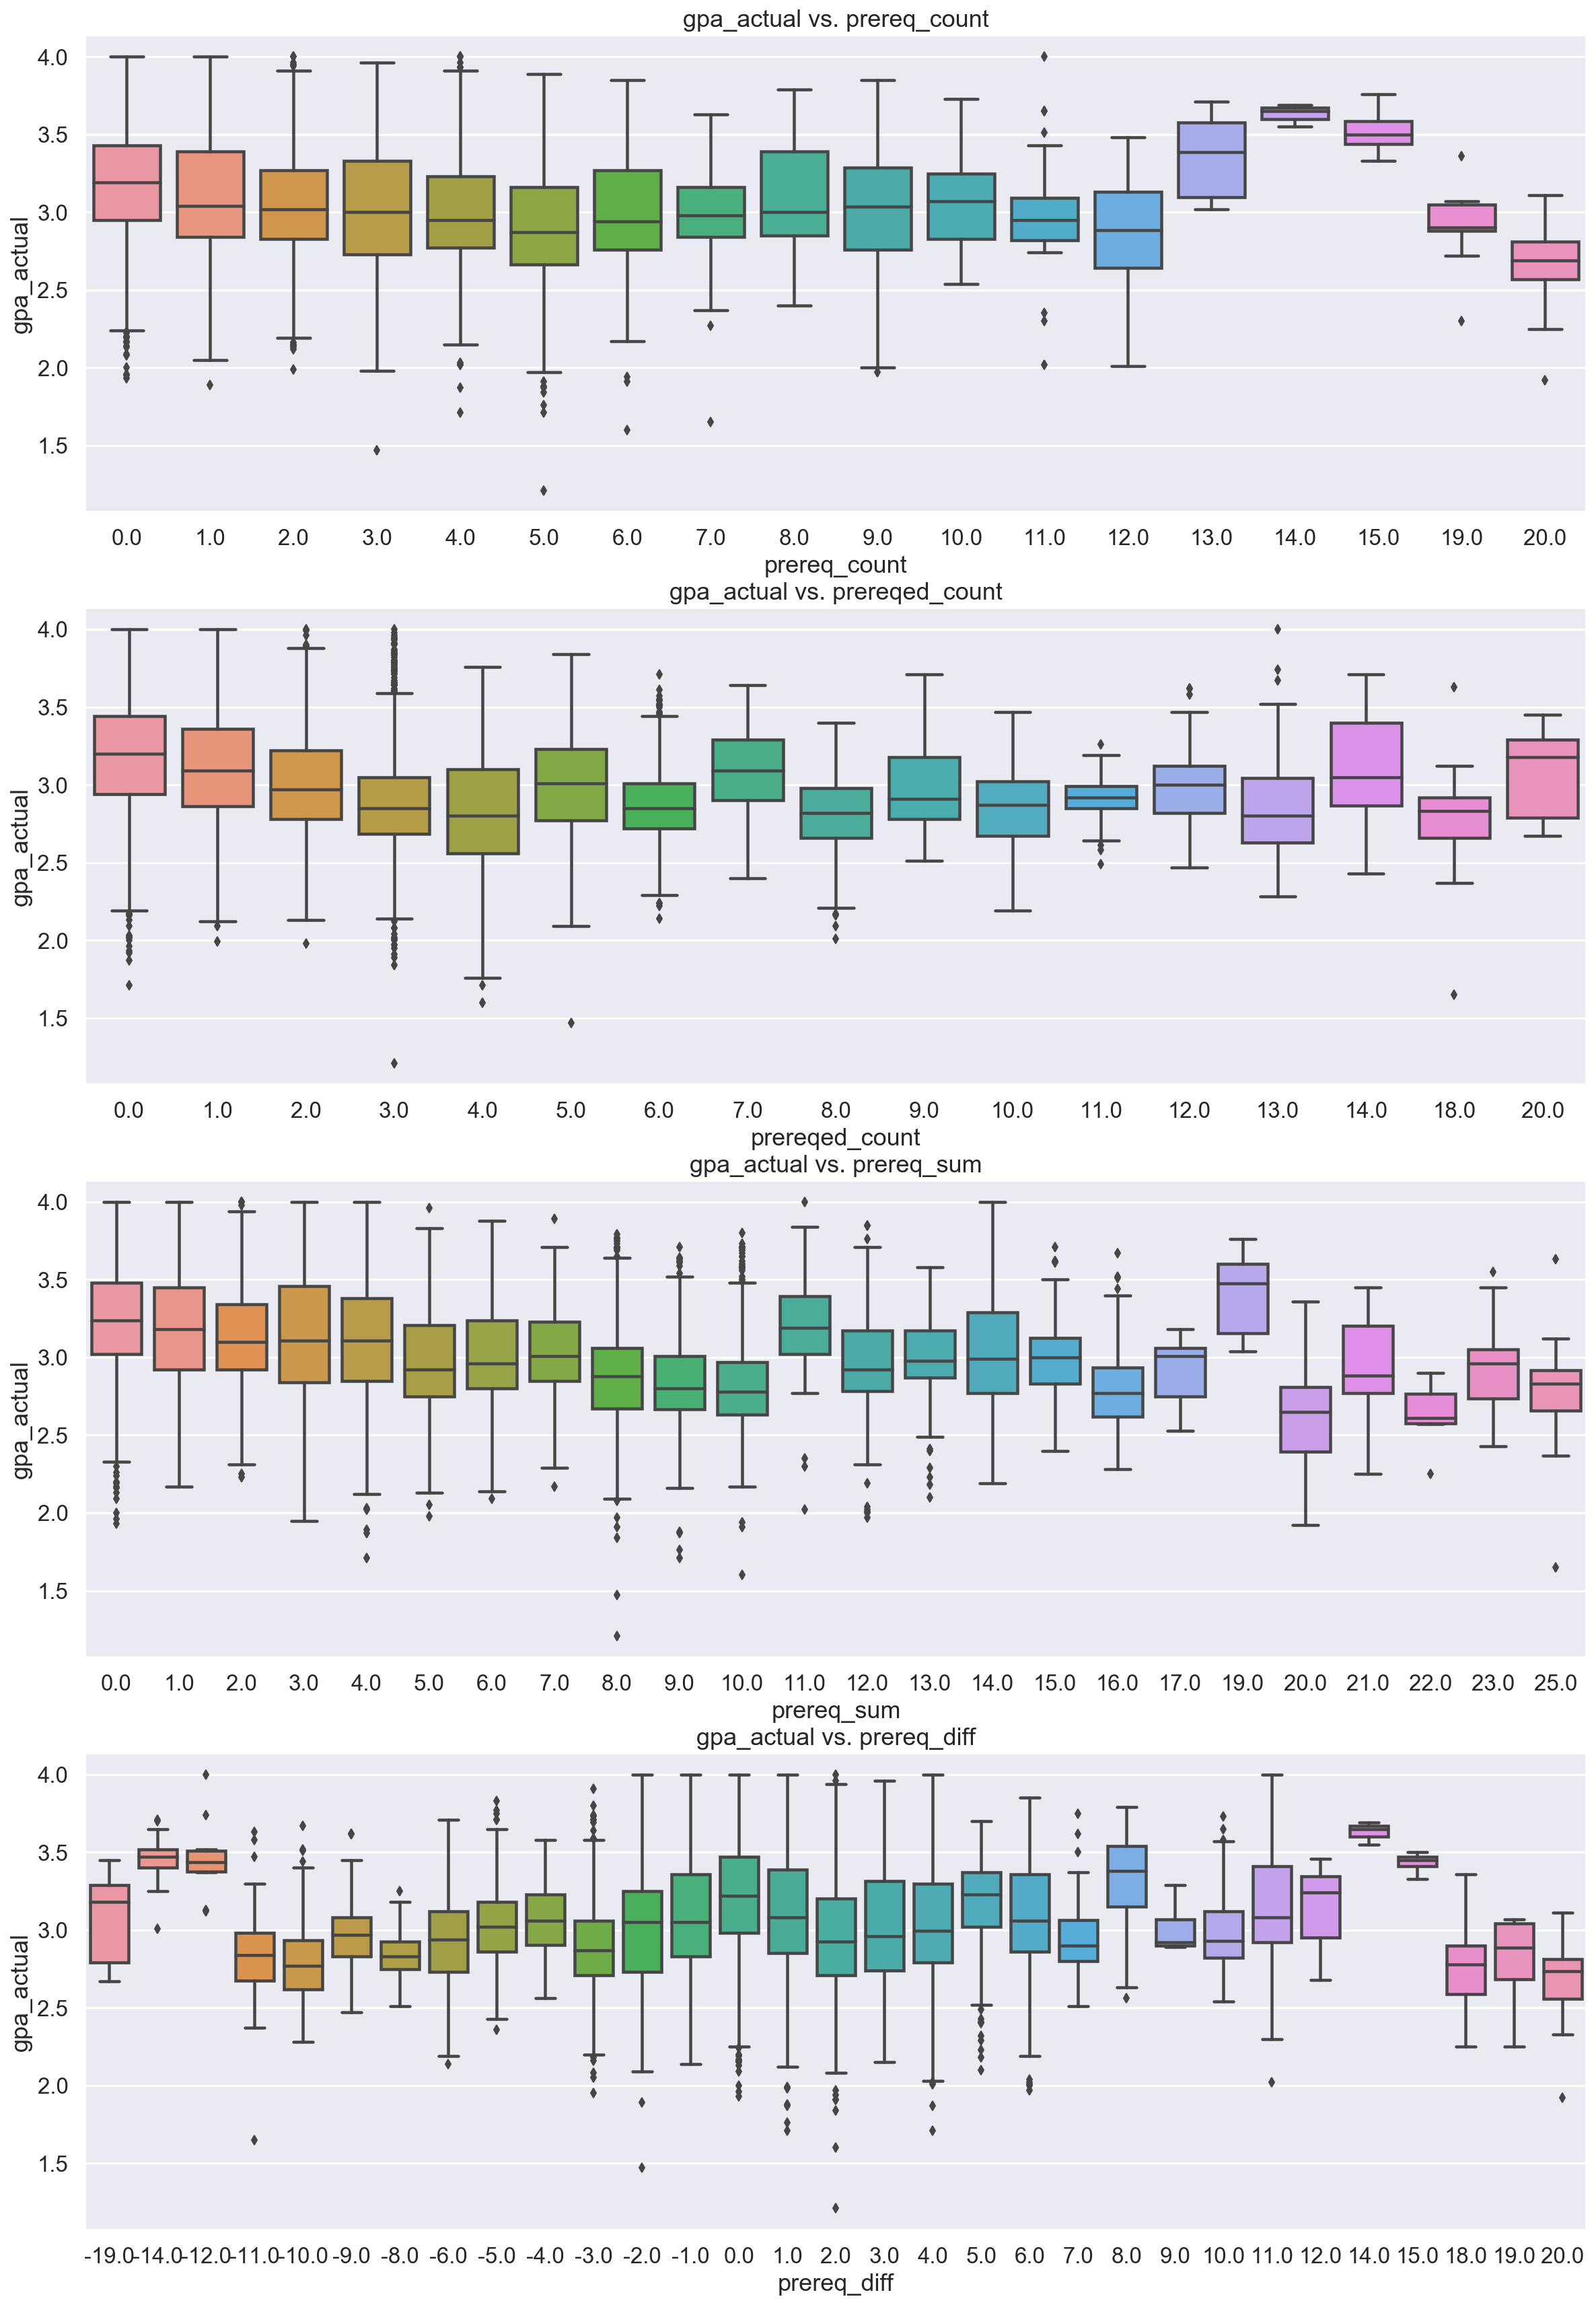

In [60]:
fig, axes = plt.subplots(4, 1, figsize=(20,30))
sns.boxplot(x='prereq_count',y='gpa_actual',data=all_df, ax=axes[0])
sns.boxplot(x='prereqed_count',y='gpa_actual',data=all_df, ax=axes[1])
sns.boxplot(x='prereq_sum',y='gpa_actual',data=all_df, ax=axes[2])
sns.boxplot(x='prereq_diff',y='gpa_actual',data=all_df, ax=axes[3])
axes[0].set_title('gpa_actual vs. prereq_count');
axes[1].set_title('gpa_actual vs. prereqed_count');
axes[2].set_title('gpa_actual vs. prereq_sum');
axes[3].set_title('gpa_actual vs. prereq_diff');

The boxplots above do not show any uniform linear correlations. However, some of them show linear correlations for a limited range of the corresponding x-variables:
1. `gpa_actual` decreases as `prereq_count` increases from 0 to 5 and increases as `prereq_count` increases from 5 to 10.
2. `gpa_actual` decreases as `prereqed_count` increases from 0 to 4.
3. `gpa_actual` decreases as `prereq_sum` increases from 0 to 10.

Although the above 3 correlations are only linear in certain ranges, the next cell shows that these ranges actually represent the majority of courses.

In [61]:
print('0 <= prereq_count <= 5: ', all_df[all_df['prereq_count'] <= 5].shape[0]/all_df['prereq_count'].count())
print('5 <= prereq_count <= 10: ', all_df[(all_df['prereq_count'] >= 5) & (all_df['prereq_count'] <= 10)].shape[0]/all_df['prereq_count'].count())
print('0 <= prereqed_count <= 4: ', all_df[all_df['prereqed_count'] <= 4].shape[0]/all_df['prereqed_count'].count())
print('0 <= prereq_sum <= 10: ', all_df[all_df['prereq_sum'] <= 10].shape[0]/all_df['prereq_sum'].count())

0 <= prereq_count <= 5:  0.8423047763457164
5 <= prereq_count <= 10:  0.19863532979529946
0 <= prereqed_count <= 4:  0.8521607278241091
0 <= prereq_sum <= 10:  0.9095905989385898


As shown above:
1. About 84% of the courses in this analysis have 0 <= `prereq_count` <= 5, and about 20% of the courses in this analysis have 5 <= `prereq_count` <= 10.
2. About 85% of the courses in this analysis have 0 <= `prereqed_count` <= 4.
3. About 91% of the courses in this analysis have 0 <= `prereq_sum` <= 10.

__Inferential Analysis - Generalized Linear Model__

Since we have been unsuccessful in transforming the Poisson-distributed `prereq_count`, `prereqed_count`, and `prereq_sum` to normal distributions, and since `prereq_diff` and `gpa_actual` are not linearly related, we cannot use linear regression on these variables. Instead, we will use a Generalized Linear Model for to try to describe the relationships between `gpa_actual` and `prereq_count`, `prereqed_count`, `prereq_sum`, and `prereq_diff`.
<br>According to <https://online.stat.psu.edu/stat504/node/216/>, a Generalized Linear Model does not rely on dependent variables having normal distributions; however, the dependent variables must have the same distribution. Since `prereq_count`, `prereqed_count`, and `prereq_sum` all roughly have Poisson distributions. We are going to neglect `prereq_diff` and use a Generalized Linear Model on the other three dependent variables.

<br>Furthermore, since `prereq_sum` is the sum of `prereq_count` and `prereqed_count`, it is likely colinear with the latter two. Therefore, I will use the first Generalized Linear Model for `prereq_count` and `prereqed_count`, and the second Generalized Linear Model for `prereq_sum`. 

In [62]:
outcome, predictors = patsy.dmatrices("gpa_actual ~ prereq_count + prereqed_count", all_df)
mod = sm.GLM(outcome, predictors)
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             gpa_actual   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10549
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.12105
Method:                          IRLS   Log-Likelihood:                -3830.6
Date:                Thu, 19 Mar 2020   Deviance:                       1277.0
Time:                        23:11:29   Pearson chi2:                 1.28e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1949      0.005    673.

In [63]:
outcome, predictors = patsy.dmatrices("gpa_actual ~ prereq_sum", all_df)
mod = sm.GLM(outcome, predictors)
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             gpa_actual   No. Observations:                10552
Model:                            GLM   Df Residuals:                    10550
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.12121
Method:                          IRLS   Log-Likelihood:                -3838.0
Date:                Thu, 19 Mar 2020   Deviance:                       1278.7
Time:                        23:11:29   Pearson chi2:                 1.28e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1975      0.005    680.928      0.0

The results of Generalized Linear Models above show that all three dependent variables have some kind of inverse proportional relationship with `gpa_actual`. Furthermore, since their P values are all 0, we can conclude that `gpa_actual` is correlated `prereq_count`, `prereqed_count`, and `prereq_sum`.

----

## Order of Correlation
Finally, we combine the potentially correlating variables from part 1 to part 5 into a multi linear regression model to find their overall significance of correlation to GPA.

__Note__: this section applies linear regression regardless of the linearity and/or normality of the data. Although, under this condition, the resulting P-value is meaningless, however, the idea is that if a certain dependent variable is actually correlated to average GPA (`gpa_actual`), then its coefficient tells us how much it influences average GPA. Since our goal for this last part is to identify what factors can potentially influence a class’s average GPA instead of trying to prove whether or not there must be correlations between the variables, this approach is still meaningful. Source of information regarding the necessity of normally distributed data for linear regression comes from: https://data.library.virginia.edu/normality-assumption/

In [64]:
outcome, predictors = patsy.dmatrices("gpa_actual ~ rmp_difficulty + prereq_sum + prereq_diff"
                                      "+ rmp_score + prereq_count + major_gpa"
                                      "+ is_upper + prereqed_count + rcmnd_class"
                                      "+ rcmnd_instr + time + evals + enroll", all_df)

mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

model_summary = pd.read_html(res.summary2().as_html())[1]
model_summary.columns = np.insert(model_summary.iloc[0].dropna().to_numpy(), 0, 'Stat')
model_summary.index = model_summary.iloc[:,0]
model_summary = model_summary.iloc[1:,1:].dropna()

                            OLS Regression Results                            
Dep. Variable:             gpa_actual   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     672.1
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:11:29   Log-Likelihood:                -1595.1
No. Observations:               10552   AIC:                             3214.
Df Residuals:                   10540   BIC:                             3301.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9406      0.063  

In [65]:
model_summary

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Stat,,,,,,
Intercept,0.9406,0.0633,14.8596,0.0000,0.8165,1.0646
is_upper[T.True],0.0302,0.0060,4.9997,0.0000,0.0184,0.0420
rmp_difficulty,-0.1327,0.0059,-22.6861,0.0000,-0.1442,-0.1213
prereq_sum,-0.0025,0.0005,-5.3604,0.0000,-0.0034,-0.0016
prereq_diff,0.0045,0.0005,9.2891,0.0000,0.0036,0.0055
rmp_score,-0.0302,0.0051,-5.8810,0.0000,-0.0402,-0.0201
prereq_count,0.0010,0.0003,2.8695,0.0041,0.0003,0.0017
major_gpa,0.7526,0.0152,49.4710,0.0000,0.7228,0.7824
prereqed_count,-0.0035,0.0003,-10.8672,0.0000,-0.0041,-0.0029


In [66]:
model_summary['Coef.'].astype('float').apply(abs).sort_values(ascending=False)

Stat
Intercept           0.9406
major_gpa           0.7526
rcmnd_instr         0.2231
rcmnd_class         0.2028
rmp_difficulty      0.1327
rmp_score           0.0302
is_upper[T.True]    0.0302
prereq_diff         0.0045
time                0.0043
prereqed_count      0.0035
prereq_sum          0.0025
prereq_count        0.0010
enroll              0.0002
evals               0.0000
Name: Coef., dtype: float64

From the sorted coefficients from the linear regression summary above, we derived a rank of the variables' potential influences on average GPA. We see that major_gpa (department average GPA), rcmnd_instr, rcmnd_class, rmp_difficulty, and rmp_score have the top 5 potential influence.

----

# Ethics & Privacy

This project is created with the goal of helping students maximize their chances of receiving high GPAs. However, there are several potential drawbacks and privacy issues that we concern.
<br><br>From the stance of students:
- GPA is only a measurement of grades. Harder classes and professors often result in lower average GPAs, but the contents of those harder classes taught by harder professors might be very useful and inspiring. By avoiding those classes and professors, students could be harming their own benefits overall.

From the stance of professors:
- The information offered by this project can potentially further harm professors who are ranked lower by sources such as Rate My Professors as this project is confirming the significance of those variables. Consequently, there may be less students interested in taking courses taught by those professors, which may result in decrease of their salaries.

From the stance of the university:
- CAPE should only be accessible to UCSD students. If this project is made public, privacy issues may be incurred with respect to the school.
- If students become significantly influenced by this project's results, "good" classes may have even bigger waitlists, which is a problem that the school must deal with.

Furthermore, with respect to our data:
- This project is not able to cover all courses taught by all departments in UCSD due to variation in website naming standards (which cause issues when scraping) and incompleteness of data on Rate My Professors.
- For the data that we have access to, we strive to represent them perfectly. However, some information, such as prerequisites, have no uniform formating standards, which could have caused the corresponding accuracy to be less than perfect.

Despite these potential drawbacks and privacy issues, this project has several positive aspects:
- Students no longer need to spend a long time trying to figure out what courses they should take. Instead, to know how hard a course is, they simply need to check the standard major GPA, the Rate My Professors difficulty rating, and the prerequisite counts of that course.
- This project may serve as a wake up call for professors whom this project does not favor, reminding them that their current teaching styles could be improved.

# Conclusion & Discussion

As predicted in our hypothesis, students received higher grades in summer sessions, and there was a positive correlation between average class grade and both CAPEs recommendation rate and Rate My Professor rating. In the recommendation analysis section, we found that on CAPEs, students tend to recommend classes and instructors of the courses they are currently taking. Whereas, on Rate My Professor, students tend to give high average rating scores. It met our expectation that the difficulty level of a course, which can be represented by GPA, can be predicted from its recommendation and rating. The higher the recommendation rate and rating scores of a class/instructor are, the easier students can achieve high GPA in this course.<br><br>
On the other hand, we expected there would be a relationship between average GPA and both the percentage of submitted evaluations and the number of times the instructor has taught that course. However, our data supports the opposite. From the cape evaluation analysis, we found the number of evaluations submitted had no impact on the GPA received for the associated class. Even after accounting for the fact that professors have a tendency to give extra credit to students for completing CAPEs, the R-value between the percentage of evaluations submitted and the average GPA received remained close to 0. When we tested what type of correlations evaluation rate and GPA might have, Pearson, Kendall-tau, and Spearman all said there was no correlation. Therefore, we can safely assume there is probably no correlation between CAPE-evaluation rate and GPA received, and if there is one, its coefficient is negligible. From the first time teaching analysis, we found there is no obvious relationship between GPA and the number of times the instructor has taught the class, which is different from the students’  polarized assessments of a first-taught-course’s difficulty and their expected grade. Besides that, we suspected that fall quarter will have a bettern GPA than spring, and taking a course in summer will likely get you better grade. However, as our data suggests that, there is no consistant relationshop between grades received for the same class if taken in Fall or Winter or Spring. There is indeed a trend of grade increase for classes in summer as compared to the same class in normal quarters, but that increase is very small. Furthermore, we expected the average course GPA would decrease as the number of prerequisites for the class increased, but there wasn’t a consistent relationship. For classes with low numbers of prerequisites, the relationship was negative. There was a positive relationship for classes with an average number of prerequisites that becomes random as the number of prerequisites increases.<br><br>
We have encountered many limitations and challenges across our project. First of all, it’s very messy dealing with real-world data. Furthermore, throughout the analyses, we have discarded certain courses in order to facilitate our work. Therefore, we recognize that our analyses do not apply to all courses at UCSD. The last part of our analyses, Order of Correlation, applied linear regression regardless of the linearity and/or normality of the data. Although, under this condition, the resulting P-value is meaningless, the idea is that if a certain dependent variable is actually correlated to average GPA, then its coefficient tells us how much it influences average GPA. Since our goal for this last part is to identify what factors can potentially influence a class’s average GPA instead of trying to prove whether or not there must be correlations between the variables, this approach is still meaningful. The positive impacts this project may cause mainly include facilitating UCSD students’ course selection process. On the other hand, we may be potentially exposing UCSD’s CAPE data and causing certain harm to students and professors with respect to learning and teaching that cannot be directly measured by GPA. More detailed discussion on the impacts of this project is done in the Ethics & Privacy section. Future work for this project could include acquiring more data and build a more precise GPA prediction model; Use natural language processing on the course description data we have to act as another predictor, etc.

# Team Contributions

__CAPE data Scrapping__ (William Lui, Yanxun Li, Cuiyi Tang)
<br>__RateMyProfessor data Scrapping__ (Whole Team)
<br>__UCSD Catalog Scrapping__ (Minghui Zhao, Fei Yin)
<br>__Data Cleaning__ (Minghui Zhao)
<br>__Research Question 1: Cape Evaluation Analysis__ (William Lui)
<br>__Research Question 2: First Time Teaching Analysis__ (Cuiyi Tang)
<br>__Research Question 3: Quarter Difference Analysis__ (Minghui Zhao)
<br>__Research Question 4: Recommendation Analysis__ (Yanxun Li)
<br>__Research Question 5: Prerequisite Analysis__ (Fei Yin)
<br>__Video Presentation Editting__  (Minghui Zhao)
<br>__Everthing else__ (Whole Team)